In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.cluster import KMeans 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Social Media Data for DSBA.csv')

In [3]:
df.head()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [5]:
df.duplicated().sum()

0

In [6]:
df[~df.applymap(np.isreal).all(1)]

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0      1000001           Yes                           307.0  iOS and Android   
1      1000002            No                           367.0              iOS   
2      1000003           Yes                           277.0  iOS and Android   
3      1000004            No                           247.0              iOS   
4      1000005            No                           202.0  iOS and Android   
...        ...           ...                             ...              ...   
11755  1011756            No                           279.0           Laptop   
11756  1011757            No                           305.0              Tab   
11757  1011758            No                           214.0              Tab   
11758  1011759            No                           382.0           Laptop   
11759  1011760            No                           270.0              Tab   

       total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                      38570.0                              1   
1                                       9765.0                              1   
2                                      48055.0                              1   
3                                      48720.0                              1   
4                                      20685.0                              1   
...                                        ...                            ...   
11755                                  30987.0                             23   
11756                                  21510.0                              6   
11757                                   5478.0                              4   
11758                                  35851.0                              2   
11759                                  22025.0                              8   

      member_in_family preferred_location_type  \
0                    2               Financial   
1                    1               Financial   
2                    2                   Other   
3                    4               Financial   
4                    1                 Medical   
...                ...                     ...   
11755                2         Historical site   
11756                1         Historical site   
11757                3                   Beach   
11758                3         Historical site   
11759                3         Historical site   

       Yearly_avg_comment_on_travel_page  \
0                                   94.0   
1                                   61.0   
2                                   92.0   
3                                   56.0   
4                                   40.0   
...                                  ...   
11755                               58.0   
11756                               55.0   
11757                              103.0   
11758                               83.0   
11759                              104.0   

       total_likes_on_outofstation_checkin_received  \
0                                              5993   
1                                              5130   
2                                              2090   
3                                              2909   
4                                              3468   
...                                             ...   
11755                                          2616   
11756                                         10041   
11757                                          6203   
11758                                          5444   
11759                                          4470   

       week_since_last_outstation_checkin following_company_page  \
0                                       8                    Yes   
1                                       1                     No   
2                                       6                    Yes   

In [7]:
df.groupby(["Taken_product"]).count()

UserID  Yearly_avg_view_on_travel_page  preferred_device  \
Taken_product                                                             
No               9864                            9370              9821   
Yes              1896                            1809              1886   

               total_likes_on_outstation_checkin_given  \
Taken_product                                            
No                                                9544   
Yes                                               1835   

               yearly_avg_Outstation_checkins  member_in_family  \
Taken_product                                                     
No                                       9799              9864   
Yes                                      1886              1896   

               preferred_location_type  Yearly_avg_comment_on_travel_page  \
Taken_product                                                               
No                                9836                               9691   
Yes                               1893                               1863   

               total_likes_on_outofstation_checkin_received  \
Taken_product                                                 
No                                                     9864   
Yes                                                    1896   

               week_since_last_outstation_checkin  following_company_page  \
Taken_product                                                               
No                                           9864                    9778   
Yes                                          1896                    1879   

               montly_avg_comment_on_company_page  working_flag  \
Taken_product                                                     
No                                           9864          9864   
Yes                                          1896          1896   

               travelling_network_rating  Adult_flag  \
Taken_product                                          
No                                  9864        9864   
Yes                                 1896        1896   

               Daily_Avg_mins_spend_on_traveling_page  
Taken_product                                          
No                                               9864  
Yes                                              1896

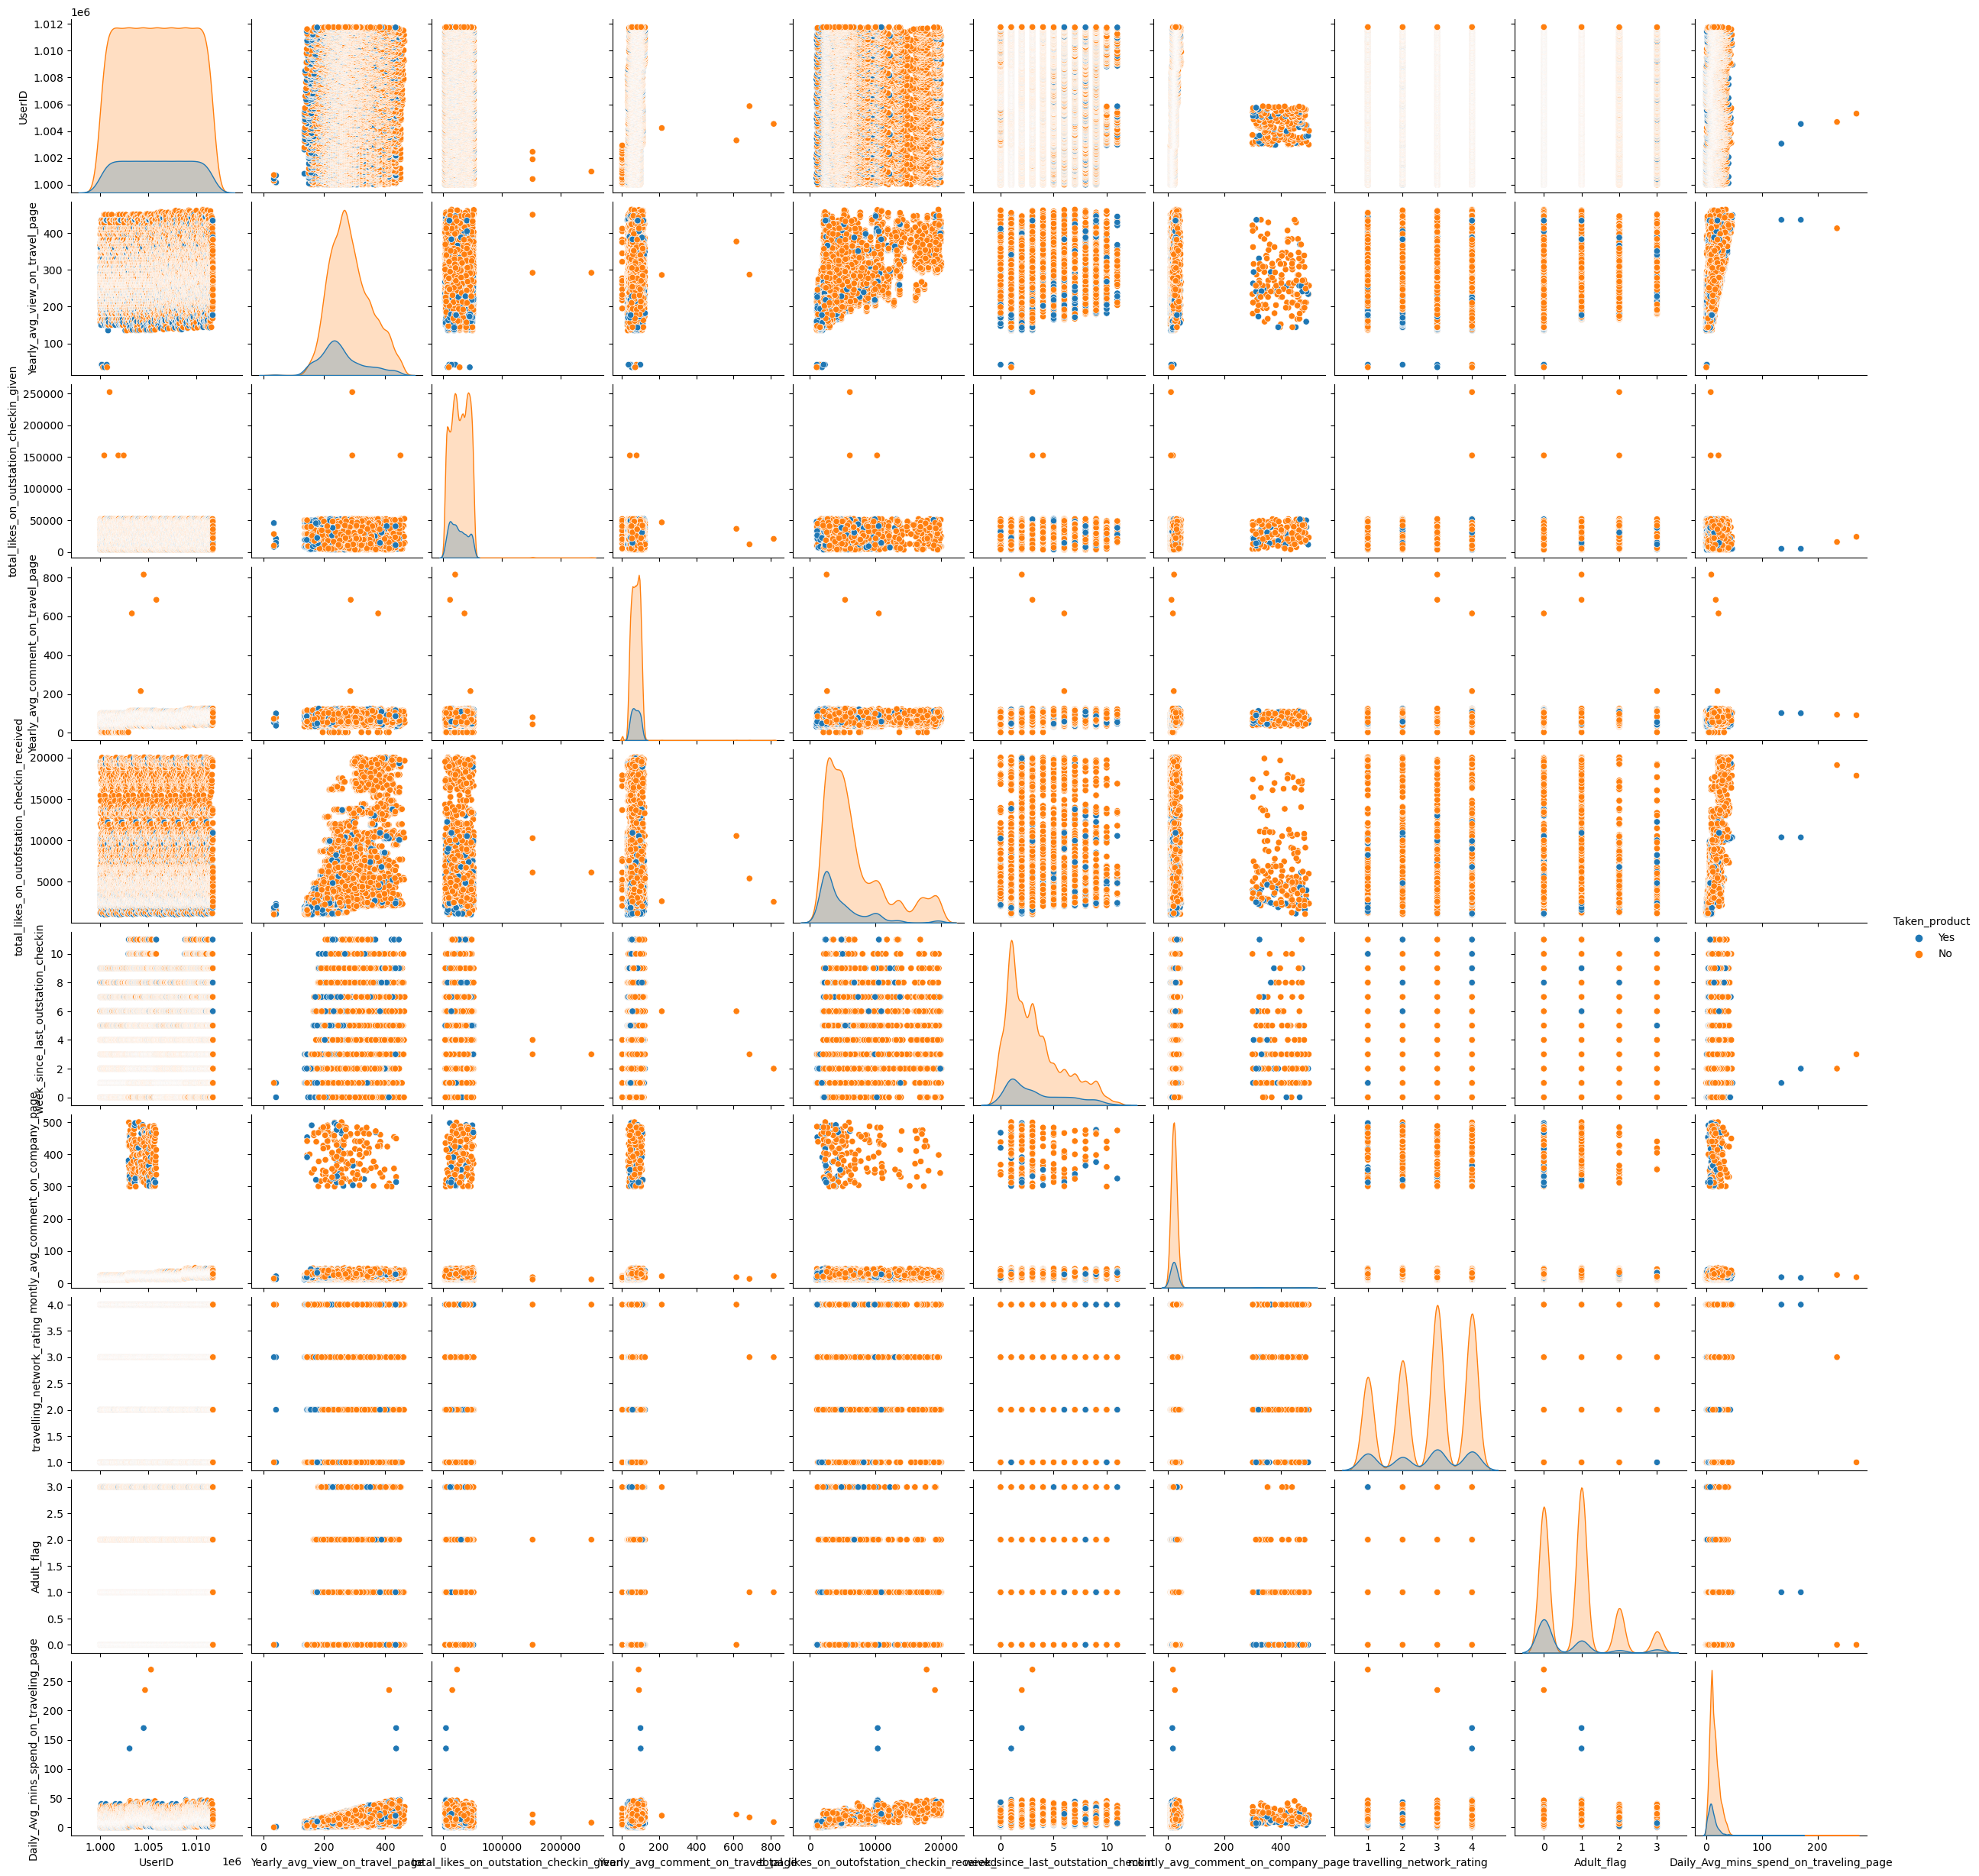

In [8]:
# Pairplot using sns

sns.pairplot(df , hue='Taken_product' , diag_kind = 'kde')

In [10]:
dataset.describe(include='all').T

NameError: name 'dataset' is not defined

In [11]:
dataset = df.copy()

In [12]:
dataset.head()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

In [13]:
dataset_na=dataset.isna().sum()
dataset_na[dataset_na.values > 0].sort_values(ascending=False)

Yearly_avg_view_on_travel_page             581
total_likes_on_outstation_checkin_given    381
Yearly_avg_comment_on_travel_page          206
following_company_page                     103
yearly_avg_Outstation_checkins              75
preferred_device                            53
preferred_location_type                     31
dtype: int64

In [14]:
for feature in dataset.columns: 
    if dataset[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(dataset[feature].unique()))
       ## print(pd.Categorical(cell_df[feature].unique()).codes)
       ## cell_df[feature] = pd.Categorical(cell_df[feature]).codes



feature: Taken_product
['Yes', 'No']
Categories (2, object): ['No', 'Yes']


feature: preferred_device
['iOS and Android', 'iOS', 'ANDROID', NaN, 'Android', ..., 'Other', 'Others', 'Tab', 'Laptop', 'Mobile']
Length: 11
Categories (10, object): ['ANDROID', 'Android', 'Android OS', 'Laptop', ..., 'Others', 'Tab', 'iOS', 'iOS and Android']


feature: yearly_avg_Outstation_checkins
['1', '24', '23', '27', '16', ..., '3', '9', '7', '6', '4']
Length: 31
Categories (30, object): ['*', '1', '10', '11', ..., '6', '7', '8', '9']


feature: member_in_family
['2', '1', '4', 'Three', '3', '5', '10']
Categories (7, object): ['1', '10', '2', '3', '4', '5', 'Three']


feature: preferred_location_type
['Financial', 'Other', 'Medical', NaN, 'Game', ..., 'Beach', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']
Length: 16
Categories (15, object): ['Beach', 'Big Cities', 'Entertainment', 'Financial', ..., 'Social media', 'Tour  Travel', 'Tour and Travel', 'Trekking']


feature: following_co

In [15]:
dataset['preferred_location_type'].unique()

array(['Financial', 'Other', 'Medical', nan, 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel',
       'Beach', 'Historical site', 'Big Cities', 'Trekking',
       'Hill Stations'], dtype=object)

In [16]:
dataset['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

In [17]:
dataset['yearly_avg_Outstation_checkins'].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
       '*', '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [18]:
dataset['member_in_family'].unique()

array(['2', '1', '4', 'Three', '3', '5', '10'], dtype=object)

In [19]:
dataset['following_company_page'].unique()

array(['Yes', 'No', nan, '1', '0'], dtype=object)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [21]:
#replace values for Bad Data
dataset['member_in_family'].replace('Three','3',inplace=True)
dataset['following_company_page'].replace('1','Yes',inplace=True)
dataset['following_company_page'].replace('0','No',inplace=True)

In [22]:
dataset['member_in_family']=dataset['member_in_family'].astype('float64')

In [23]:
for column in df.columns:
    if dataset[column].dtype == 'object':
        print(column.upper(),': ',dataset[column].nunique())
        print(dataset[column].value_counts().sort_values())
        print('\n')

TAKEN_PRODUCT :  2
Yes    1896
No     9864
Name: Taken_product, dtype: int64


PREFERRED_DEVICE :  10
Other                 2
Others                2
ANDROID             134
Android OS          145
Android             315
Mobile              600
iOS                1095
Laptop             1108
iOS and Android    4134
Tab                4172
Name: preferred_device, dtype: int64


YEARLY_AVG_OUTSTATION_CHECKINS :  30
*        1
27      96
21     143
13     150
22     152
12     159
17     160
14     167
19     176
28     180
25     198
20     199
26     199
15     206
18     208
23     215
29     215
24     223
11     229
6      236
16     255
4      256
5      261
8      320
3      336
7      336
9      340
10     682
2      844
1     4543
Name: yearly_avg_Outstation_checkins, dtype: int64


PREFERRED_LOCATION_TYPE :  15
Movie                 5
OTT                   7
Game                 12
Tour and Travel      47
Tour  Travel         60
Hill Stations       108
Entertainment       516
T

In [24]:
dataset.describe(include='all').T

count unique    top  freq  \
UserID                                        11760.0    NaN    NaN   NaN   
Taken_product                                   11760      2     No  9864   
Yearly_avg_view_on_travel_page                11179.0    NaN    NaN   NaN   
preferred_device                                11707     10    Tab  4172   
total_likes_on_outstation_checkin_given       11379.0    NaN    NaN   NaN   
yearly_avg_Outstation_checkins                  11685     30      1  4543   
member_in_family                              11760.0    NaN    NaN   NaN   
preferred_location_type                         11729     15  Beach  2424   
Yearly_avg_comment_on_travel_page             11554.0    NaN    NaN   NaN   
total_likes_on_outofstation_checkin_received  11760.0    NaN    NaN   NaN   
week_since_last_outstation_checkin            11760.0    NaN    NaN   NaN   
following_company_page                          11657      2     No  8360   
montly_avg_comment_on_company_page            11760.0    NaN    NaN   NaN   
working_flag                                    11760      2     No  9952   
travelling_network_rating                     11760.0    NaN    NaN   NaN   
Adult_flag                                    11760.0    NaN    NaN   NaN   
Daily_Avg_mins_spend_on_traveling_page        11760.0    NaN    NaN   NaN   

                                                      mean           std  \
UserID                                           1005880.5   3394.963917   
Taken_product                                          NaN           NaN   
Yearly_avg_view_on_travel_page                  280.830844     68.182958   
preferred_device                                       NaN           NaN   
total_likes_on_outstation_checkin_given       28170.481765  14385.032134   
yearly_avg_Outstation_checkins                         NaN           NaN   
member_in_family                                  2.921344      1.044883   
preferred_location_type                                NaN           NaN   
Yearly_avg_comment_on_travel_page                74.790029      24.02665   
total_likes_on_outofstation_checkin_received   6531.699065   4706.613785   
week_since_last_outstation_checkin                3.203571      2.616365   
following_company_page                                 NaN           NaN   
montly_avg_comment_on_company_page               28.661565     48.660504   
working_flag                                           NaN           NaN   
travelling_network_rating                         2.712245      1.080887   
Adult_flag                                        0.793878      0.851823   
Daily_Avg_mins_spend_on_traveling_page           13.817432      9.070657   

                                                    min         25%  \
UserID                                        1000001.0  1002940.75   
Taken_product                                       NaN         NaN   
Yearly_avg_view_on_travel_page                     35.0       232.0   
preferred_device                                    NaN         NaN   
total_likes_on_outstation_checkin_given          3570.0     16380.0   
yearly_avg_Outstation_checkins                      NaN         NaN   
member_in_family                                    1.0         2.0   
preferred_location_type                             NaN         NaN   
Yearly_avg_comment_on_travel_page                   3.0        57.0   
total_likes_on_outofstation_checkin_received     1009.0     2940.75   
week_since_last_outstation_checkin                  0.0         1.0   
following_company_page                              NaN         NaN   
montly_avg_comment_on_company_page                 11.0        17.0   
working_flag                                        NaN         NaN   
travelling_network_rating                           1.0         2.0   
Adult_flag                                          0.0         0.0   
Daily_Avg_mins_spend_on_traveling_page              0.0         8.0   

             

# Treatment of missing values for Numerical variables

In [25]:
#replace values for Null values
dataset['yearly_avg_Outstation_checkins'].replace('*',np.NaN,inplace=True)
dataset['yearly_avg_Outstation_checkins']=dataset['yearly_avg_Outstation_checkins'].astype('float64')
dataset['yearly_avg_Outstation_checkins'].replace(np.NaN,dataset['yearly_avg_Outstation_checkins'].mean(),inplace=True)


In [26]:
#replace values for Null values
dataset['Yearly_avg_view_on_travel_page'].replace(np.NaN,dataset['Yearly_avg_view_on_travel_page'].median(),inplace=True)
dataset['Yearly_avg_view_on_travel_page']=dataset['Yearly_avg_view_on_travel_page'].astype('float64')

In [27]:
#replace values for Null values
dataset['total_likes_on_outstation_checkin_given'].replace(np.NaN,dataset['total_likes_on_outstation_checkin_given'].median(),inplace=True)
dataset['total_likes_on_outstation_checkin_given']=dataset['total_likes_on_outstation_checkin_given'].astype('float64')

In [28]:
#replace values for Null values
dataset['Yearly_avg_comment_on_travel_page'].replace(np.NaN,dataset['Yearly_avg_comment_on_travel_page'].median(),inplace=True)
dataset['Yearly_avg_comment_on_travel_page']=dataset['Yearly_avg_comment_on_travel_page'].astype('float64')

In [29]:
dataset.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                    0
preferred_device                                 53
total_likes_on_outstation_checkin_given           0
yearly_avg_Outstation_checkins                    0
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page                 0
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [30]:
dataset['yearly_avg_Outstation_checkins'].describe()


count    11760.000000
mean         8.223554
std          8.644327
min          1.000000
25%          1.000000
50%          4.000000
75%         14.000000
max         29.000000
Name: yearly_avg_Outstation_checkins, dtype: float64

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11760 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11760 non-null  float64
 5   yearly_avg_Outstation_checkins                11760 non-null  float64
 6   member_in_family                              11760 non-null  float64
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

# Treatment of missing values for Catagorical variables

In [32]:
dataset['following_company_page'].value_counts()

No     8360
Yes    3297
Name: following_company_page, dtype: int64

In [33]:
dataset['following_company_page'].mode()

0    No
Name: following_company_page, dtype: object

In [34]:
dataset['following_company_page'].replace(np.NaN,dataset['following_company_page'].mode()[0], inplace=True)

In [35]:
dataset['preferred_device'].value_counts()

Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: preferred_device, dtype: int64

In [36]:
dataset['preferred_device'].mode()

0    Tab
Name: preferred_device, dtype: object

In [37]:
dataset['preferred_device'].replace(np.NaN,dataset['preferred_device'].mode()[0], inplace=True)

In [38]:
dataset['preferred_location_type'].value_counts()

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

In [39]:
dataset['preferred_location_type'].mode()

0    Beach
Name: preferred_location_type, dtype: object

In [40]:
dataset['preferred_location_type'].replace(np.NaN,dataset['preferred_location_type'].mode()[0], inplace=True)

In [41]:
dataset.isnull().sum()

UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [42]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(dataset[column].describe(),end=' ')
   
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(dataset[column], kde=False, color='g');
    plt.show()
   
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=dataset[column])
    plt.show()

In [43]:
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

12

Description of UserID
----------------------------------------------------------------------------
count    1.176000e+04
mean     1.005880e+06
std      3.394964e+03
min      1.000001e+06
25%      1.002941e+06
50%      1.005880e+06
75%      1.008820e+06
max      1.011760e+06
Name: UserID, dtype: float64 Distribution of UserID
----------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


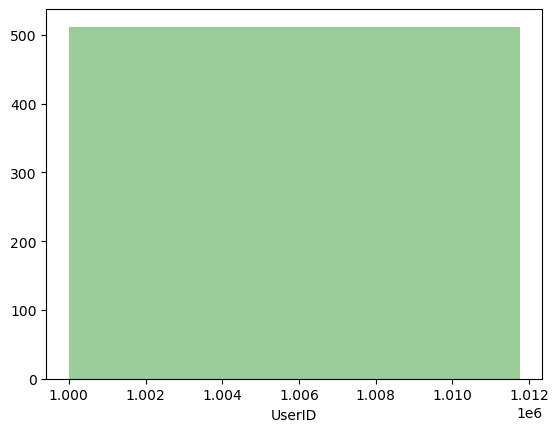

BoxPlot of UserID
----------------------------------------------------------------------------


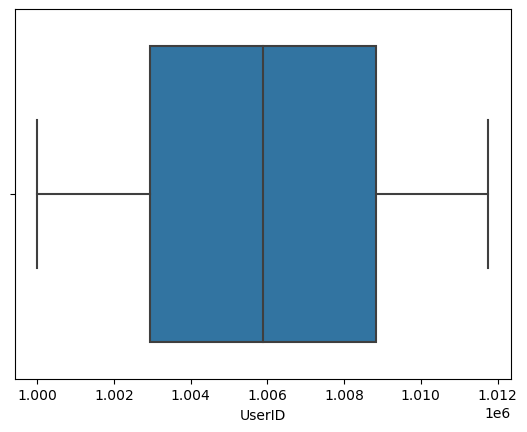

Description of Yearly_avg_view_on_travel_page
----------------------------------------------------------------------------
count    11760.000000
mean       280.345153
std         66.511330
min         35.000000
25%        233.000000
50%        271.000000
75%        322.000000
max        464.000000
Name: Yearly_avg_view_on_travel_page, dtype: float64 Distribution of Yearly_avg_view_on_travel_page
----------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


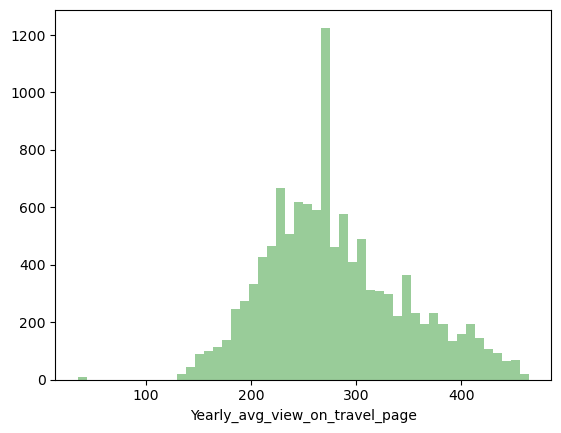

BoxPlot of Yearly_avg_view_on_travel_page
----------------------------------------------------------------------------


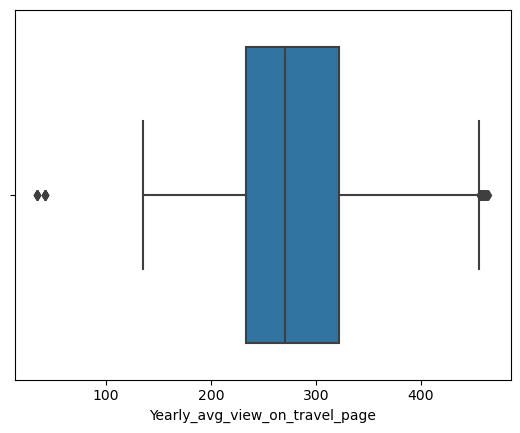

Description of total_likes_on_outstation_checkin_given
----------------------------------------------------------------------------
count     11760.000000
mean      28167.420748
std       14150.080463
min        3570.000000
25%       16697.250000
50%       28076.000000
75%       40115.250000
max      252430.000000
Name: total_likes_on_outstation_checkin_given, dtype: float64 Distribution of total_likes_on_outstation_checkin_given
----------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


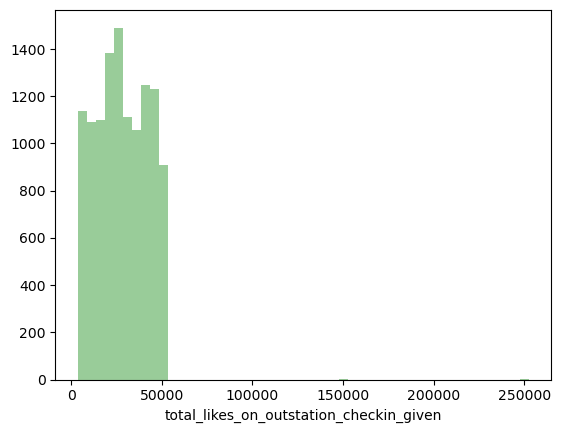

BoxPlot of total_likes_on_outstation_checkin_given
----------------------------------------------------------------------------


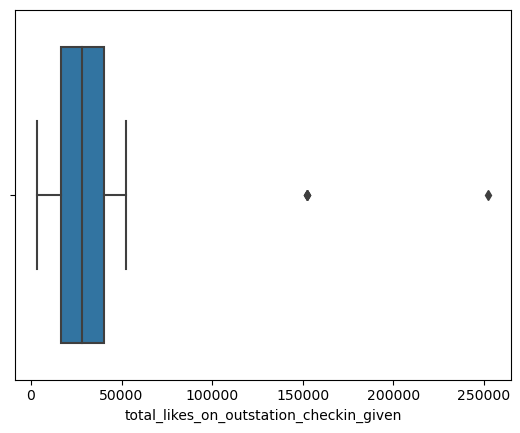

Description of yearly_avg_Outstation_checkins
----------------------------------------------------------------------------
count    11760.000000
mean         8.223554
std          8.644327
min          1.000000
25%          1.000000
50%          4.000000
75%         14.000000
max         29.000000
Name: yearly_avg_Outstation_checkins, dtype: float64 Distribution of yearly_avg_Outstation_checkins
----------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


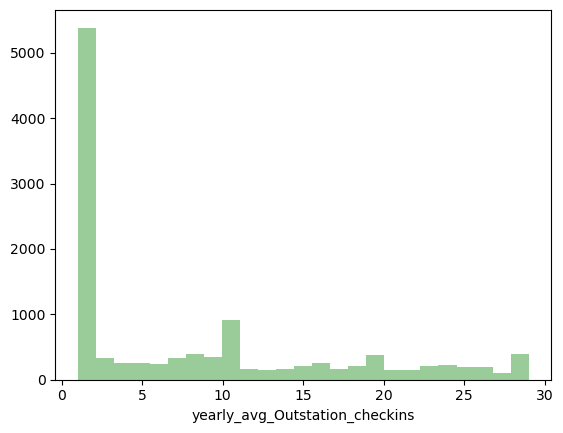

BoxPlot of yearly_avg_Outstation_checkins
----------------------------------------------------------------------------


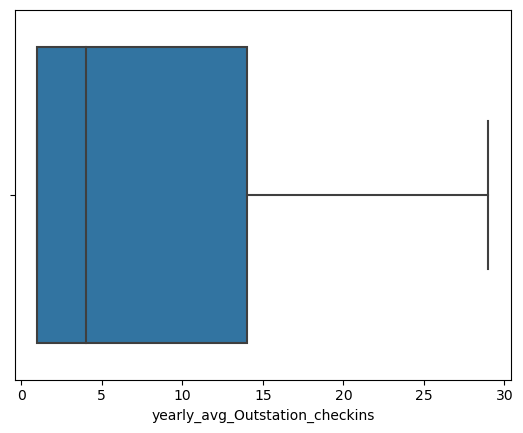

Description of member_in_family
----------------------------------------------------------------------------
count    11760.000000
mean         2.921344
std          1.044883
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: member_in_family, dtype: float64 Distribution of member_in_family
----------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


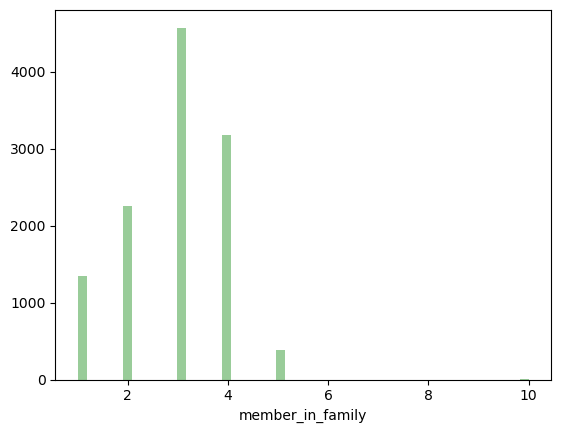

BoxPlot of member_in_family
----------------------------------------------------------------------------


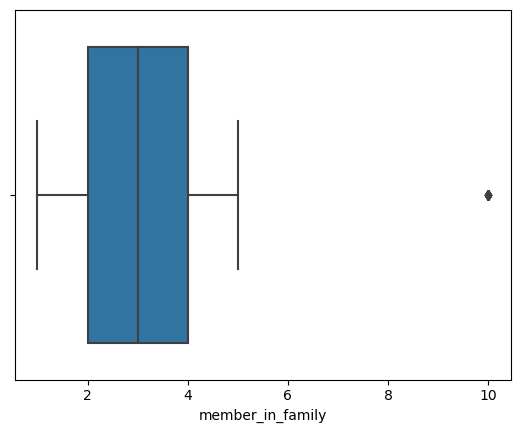

Description of Yearly_avg_comment_on_travel_page
----------------------------------------------------------------------------
count    11760.000000
mean        74.793707
std         23.815280
min          3.000000
25%         57.000000
50%         75.000000
75%         92.000000
max        815.000000
Name: Yearly_avg_comment_on_travel_page, dtype: float64 Distribution of Yearly_avg_comment_on_travel_page
----------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


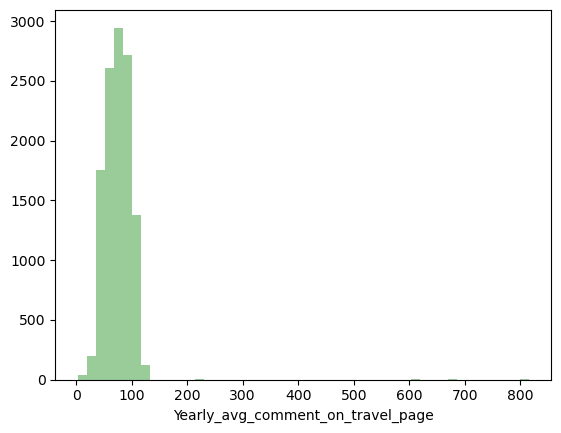

BoxPlot of Yearly_avg_comment_on_travel_page
----------------------------------------------------------------------------


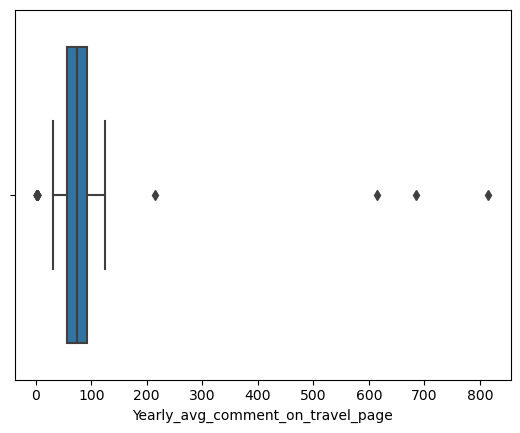

Description of total_likes_on_outofstation_checkin_received
----------------------------------------------------------------------------
count    11760.000000
mean      6531.699065
std       4706.613785
min       1009.000000
25%       2940.750000
50%       4948.000000
75%       8393.250000
max      20065.000000
Name: total_likes_on_outofstation_checkin_received, dtype: float64 Distribution of total_likes_on_outofstation_checkin_received
----------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


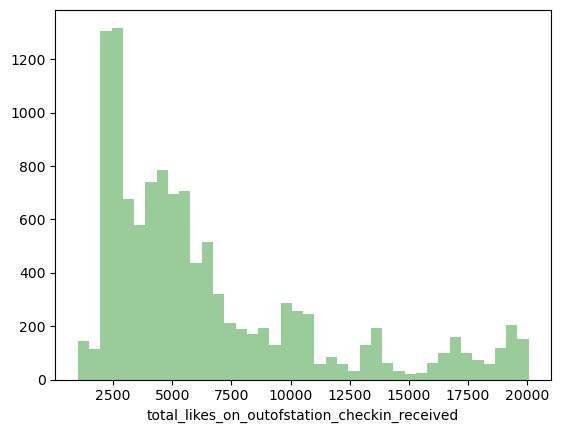

BoxPlot of total_likes_on_outofstation_checkin_received
----------------------------------------------------------------------------


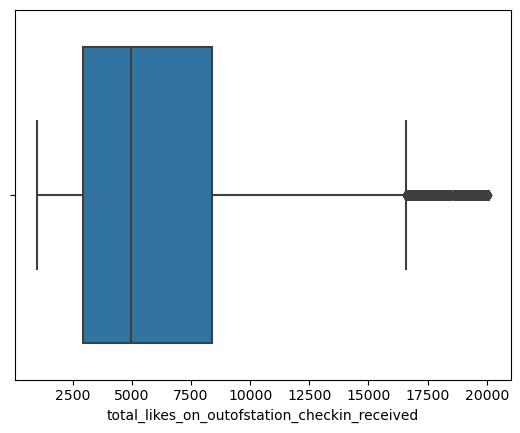

Description of week_since_last_outstation_checkin
----------------------------------------------------------------------------
count    11760.000000
mean         3.203571
std          2.616365
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         11.000000
Name: week_since_last_outstation_checkin, dtype: float64 Distribution of week_since_last_outstation_checkin
----------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


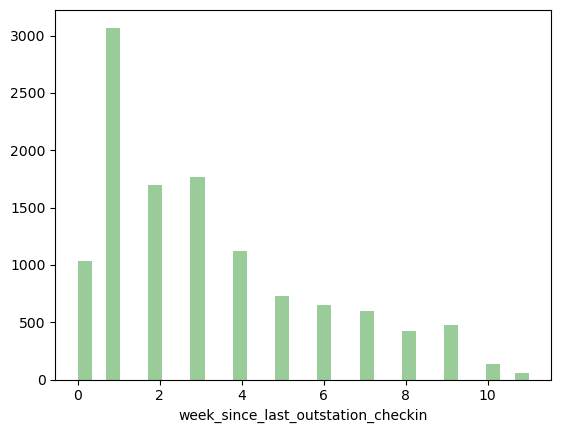

BoxPlot of week_since_last_outstation_checkin
----------------------------------------------------------------------------


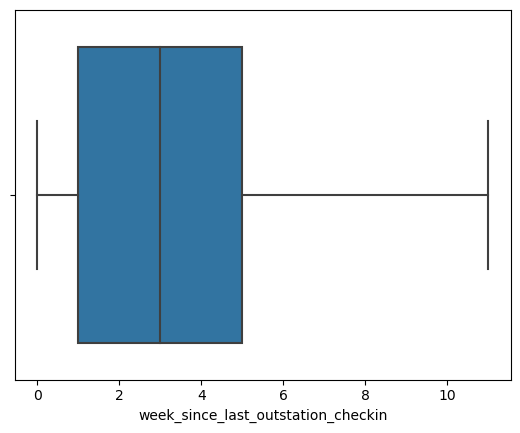

Description of montly_avg_comment_on_company_page
----------------------------------------------------------------------------
count    11760.000000
mean        28.661565
std         48.660504
min         11.000000
25%         17.000000
50%         22.000000
75%         27.000000
max        500.000000
Name: montly_avg_comment_on_company_page, dtype: float64 Distribution of montly_avg_comment_on_company_page
----------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


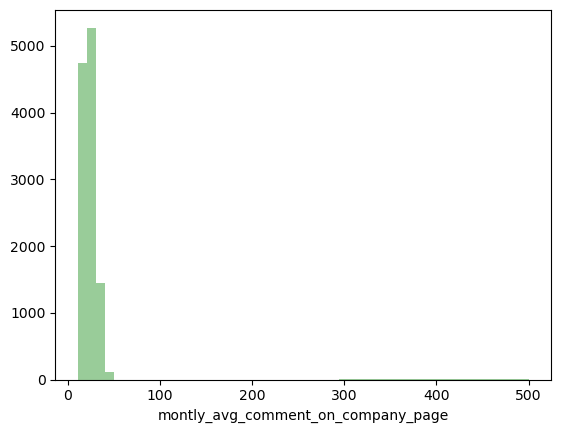

BoxPlot of montly_avg_comment_on_company_page
----------------------------------------------------------------------------


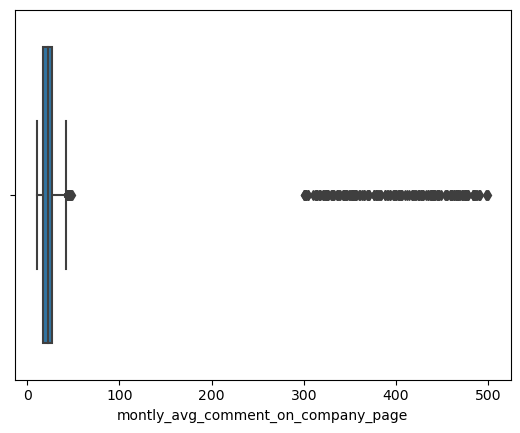

Description of travelling_network_rating
----------------------------------------------------------------------------
count    11760.000000
mean         2.712245
std          1.080887
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: travelling_network_rating, dtype: float64 Distribution of travelling_network_rating
----------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


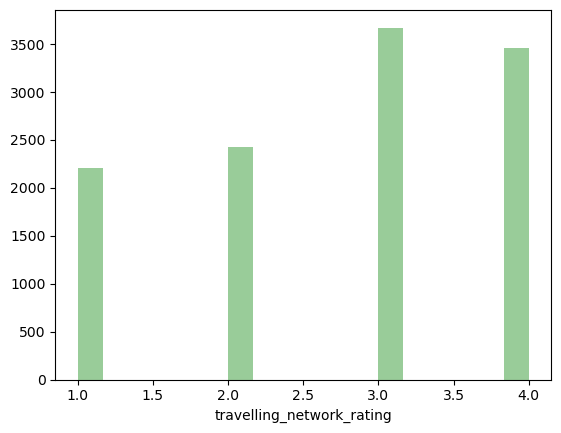

BoxPlot of travelling_network_rating
----------------------------------------------------------------------------


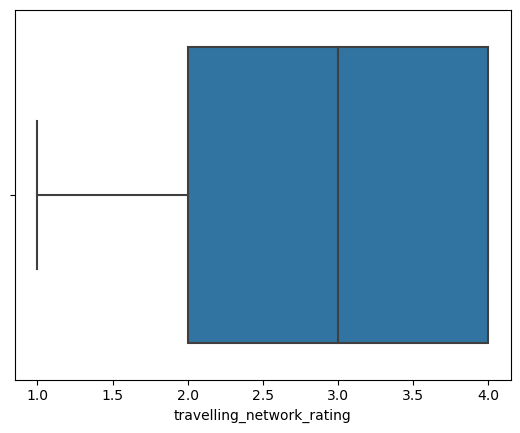

Description of Adult_flag
----------------------------------------------------------------------------
count    11760.000000
mean         0.793878
std          0.851823
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Adult_flag, dtype: float64 Distribution of Adult_flag
----------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


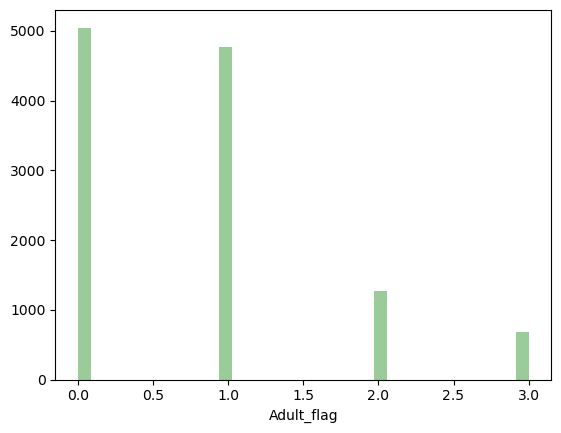

BoxPlot of Adult_flag
----------------------------------------------------------------------------


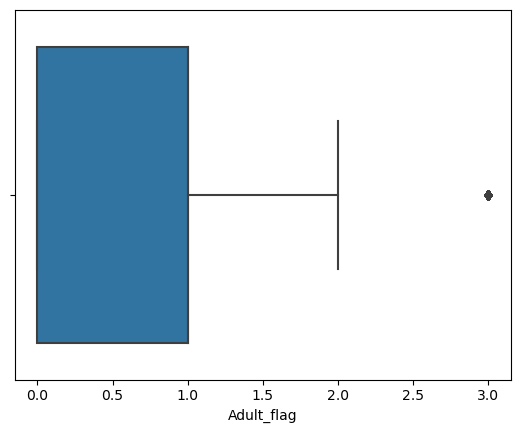

Description of Daily_Avg_mins_spend_on_traveling_page
----------------------------------------------------------------------------
count    11760.000000
mean        13.817432
std          9.070657
min          0.000000
25%          8.000000
50%         12.000000
75%         18.000000
max        270.000000
Name: Daily_Avg_mins_spend_on_traveling_page, dtype: float64 Distribution of Daily_Avg_mins_spend_on_traveling_page
----------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


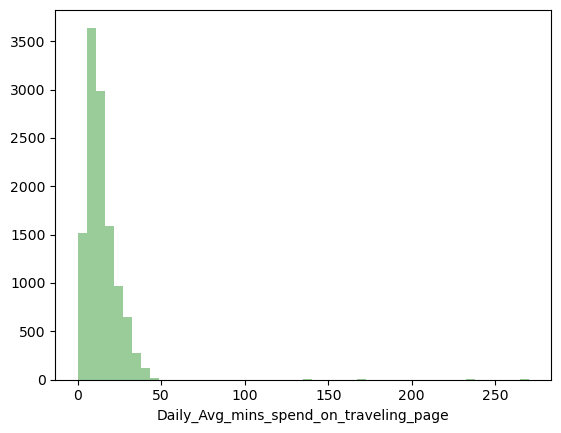

BoxPlot of Daily_Avg_mins_spend_on_traveling_page
----------------------------------------------------------------------------


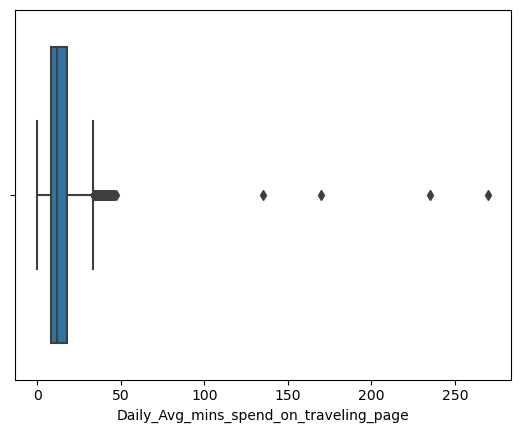

In [44]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20) 

In [45]:
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

12

### Outlier Treatment

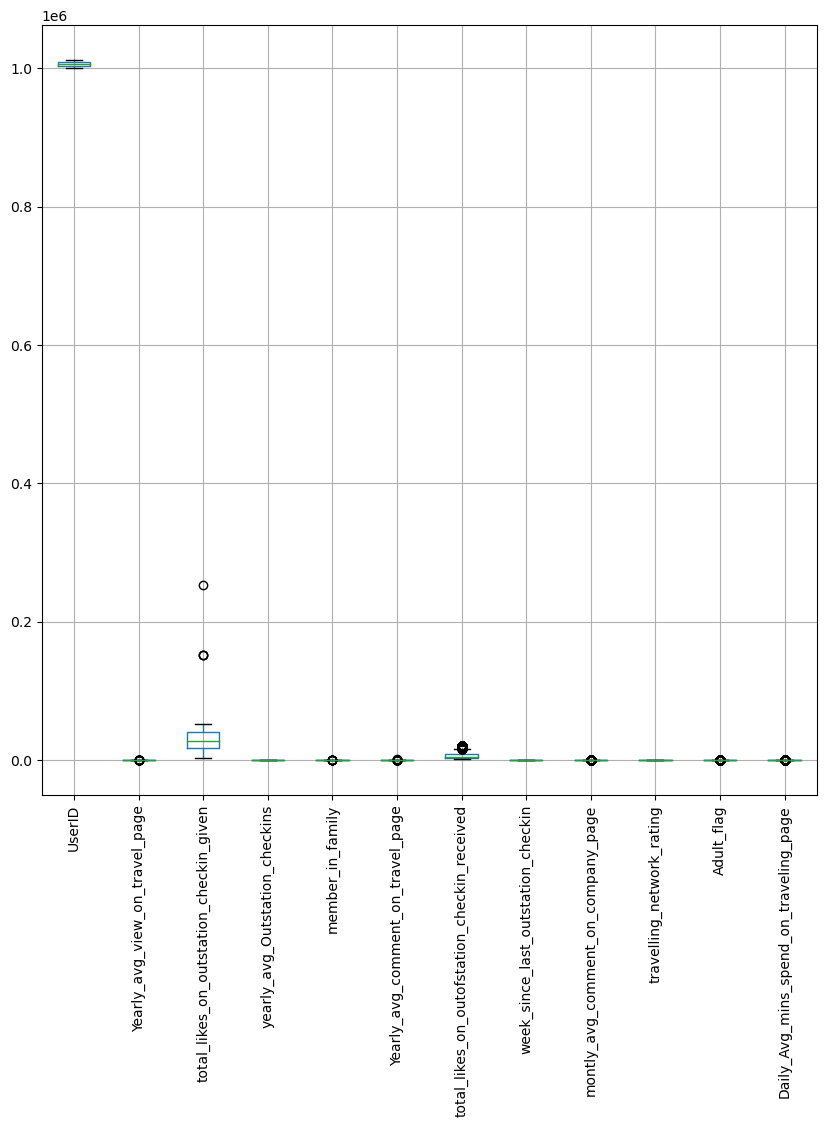

In [46]:
df_num.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

In [47]:
no_outlier = ['UserID','yearly_avg_Outstation_checkins','yearly_avg_Outstation_checkins','week_since_last_outstation_checkin','travelling_network_rating']

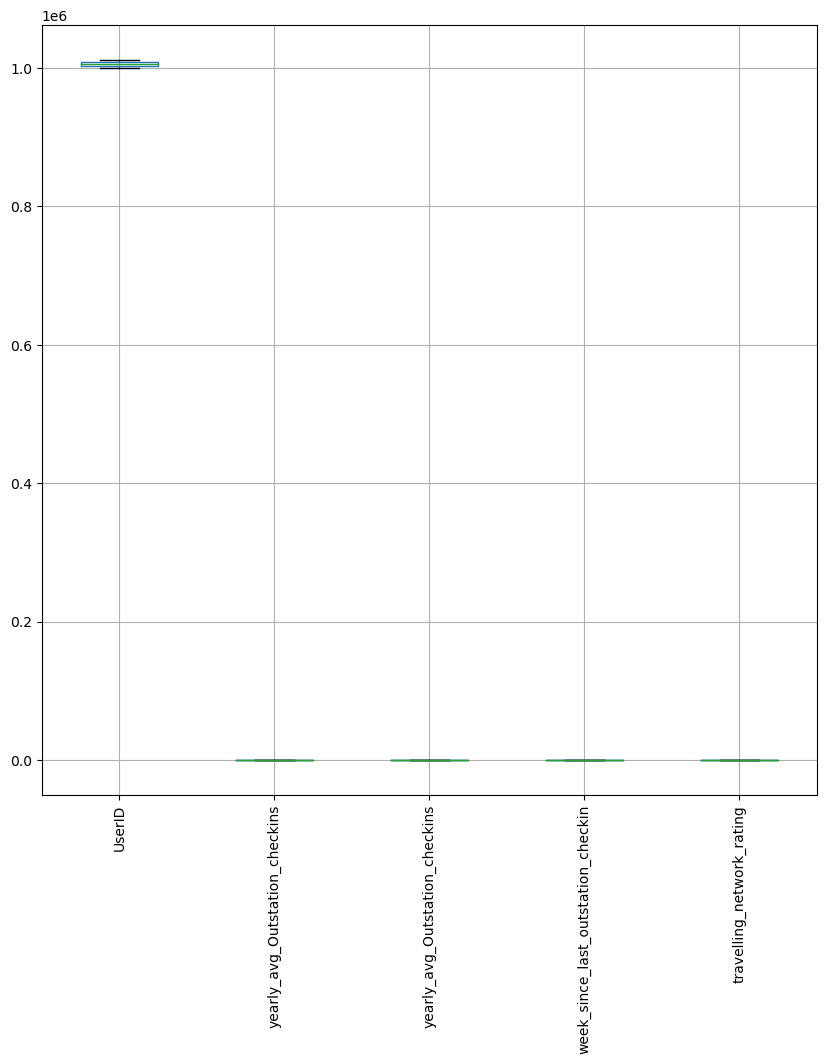

In [48]:
df_num[no_outlier].boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

In [49]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5) 
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,100)   
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [50]:
outlier_list = [x for x in df_num.columns if x not in no_outlier]

In [51]:
outlier_list

['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'member_in_family',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'montly_avg_comment_on_company_page',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']

In [52]:
df_num.head()

UserID  Yearly_avg_view_on_travel_page  \
0  1000001                           307.0   
1  1000002                           367.0   
2  1000003                           277.0   
3  1000004                           247.0   
4  1000005                           202.0   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                             1.0   
1                                   9765.0                             1.0   
2                                  48055.0                             1.0   
3                                  48720.0                             1.0   
4                                  20685.0                             1.0   

   member_in_family  Yearly_avg_comment_on_travel_page  \
0               2.0                               94.0   
1               1.0                               61.0   
2               2.0                               92.0   
3               4.0                               56.0   
4               1.0                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
0                                   8                                  11   
1                                   1                                  23   
2                                   6                                  15   
3                                   1                                  11   
4                                   9                                  12   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  
0                                       8  
1                                      10  
2                                       7  
3                                       8  
4                                       6

In [53]:
for i in df_num[outlier_list]:    
    df_num[i]=treat_outlier(df_num[i])

In [54]:
df_num

UserID  Yearly_avg_view_on_travel_page  \
0      1000001                           307.0   
1      1000002                           367.0   
2      1000003                           277.0   
3      1000004                           247.0   
4      1000005                           202.0   
...        ...                             ...   
11755  1011756                           279.0   
11756  1011757                           305.0   
11757  1011758                           214.0   
11758  1011759                           382.0   
11759  1011760                           270.0   

       total_likes_on_outstation_checkin_given  \
0                                      38570.0   
1                                       9765.0   
2                                      48055.0   
3                                      48720.0   
4                                      20685.0   
...                                        ...   
11755                                  30987.0   
11756                                  21510.0   
11757                                   5478.0   
11758                                  35851.0   
11759                                  22025.0   

       yearly_avg_Outstation_checkins  member_in_family  \
0                                 1.0               2.0   
1                                 1.0               1.0   
2                                 1.0               2.0   
3                                 1.0               4.0   
4                                 1.0               1.0   
...                               ...               ...   
11755                            23.0               2.0   
11756                             6.0               1.0   
11757                             4.0               3.0   
11758                             2.0               3.0   
11759                             8.0               3.0   

       Yearly_avg_comment_on_travel_page  \
0                                   94.0   
1                                   61.0   
2                                   92.0   
3                                   56.0   
4                                   40.0   
...                                  ...   
11755                               58.0   
11756                               55.0   
11757                              103.0   
11758                               83.0   
11759                              104.0   

       total_likes_on_outofstation_checkin_received  \
0                                            5993.0   
1                                            5130.0   
2                                            2090.0   
3                                            2909.0   
4                                            3468.0   
...                                             ...   
11755                                        2616.0   
11756                                       10041.0   
11757                                        6203.0   
11758                                        5444.0   
11759                                        4470.0   

       week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
0                                       8                                11.0   
1                                       1                                23.0   
2                                       6                                15.0   
3                                       1                                11.0   
4                                       9                                12.0   
...                                   ...                                 ...   
11755                                   4                                36.0   
11756                                   4                                30.0   
11757                                   3                                40.0   
11758                                   3                                32.0   
11759           

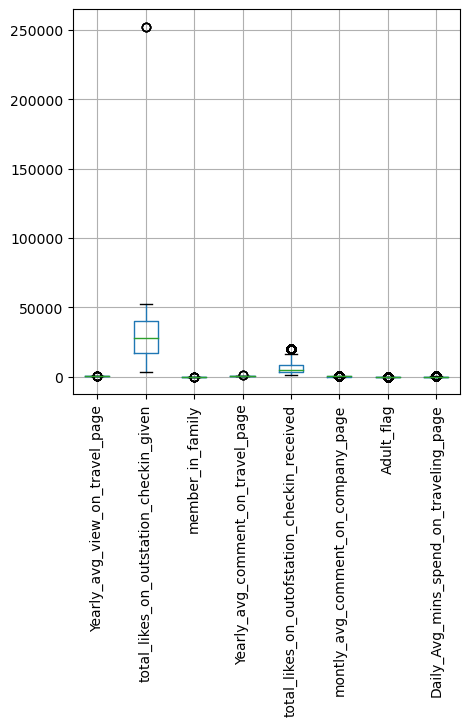

In [55]:
df_num[outlier_list].boxplot(figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

In [56]:
#Scaling the data

In [57]:
#Scaling data
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

UserID  Yearly_avg_view_on_travel_page  \
0 -1.731904                        0.400539   
1 -1.731609                        1.306215   
2 -1.731314                       -0.052298   
3 -1.731020                       -0.505136   
4 -1.730725                       -1.184393   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                 0.717632                       -0.835676   
1                                -1.274392                       -0.835676   
2                                 1.373571                       -0.835676   
3                                 1.419560                       -0.835676   
4                                -0.519214                       -0.835676   

   member_in_family  Yearly_avg_comment_on_travel_page  \
0         -0.881805                           0.753581   
1         -1.838891                          -0.554521   
2         -0.881805                           0.674302   
3          1.032367                          -0.752718   
4         -1.838891                          -1.386949   

   total_likes_on_outofstation_checkin_received  \
0                                     -0.132571   
1                                     -0.304155   
2                                     -0.908574   
3                                     -0.745739   
4                                     -0.634597   

   week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
0                            1.833319                           -0.312299   
1                           -0.842262                           -0.136184   
2                            1.068868                           -0.253594   
3                           -0.842262                           -0.312299   
4                            2.215545                           -0.297623   

   travelling_network_rating  Adult_flag  \
0                  -1.584178   -0.932014   
1                   1.191438    0.241988   
2                  -0.658973   -0.932014   
3                   0.266233   -0.932014   
4                   1.191438    0.241988   

   Daily_Avg_mins_spend_on_traveling_page  
0                               -0.286661  
1                               -0.241472  
2                               -0.309256  
3                               -0.286661  
4                               -0.331850

In [58]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  float64
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   total_likes_on_outstation_checkin_given       11760 non-null  float64
 3   yearly_avg_Outstation_checkins                11760 non-null  float64
 4   member_in_family                              11760 non-null  float64
 5   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 6   total_likes_on_outofstation_checkin_received  11760 non-null  float64
 7   week_since_last_outstation_checkin            11760 non-null  float64
 8   montly_avg_comment_on_company_page            11760 non-null  float64
 9   travelling_network_rating                     11760 non-null 

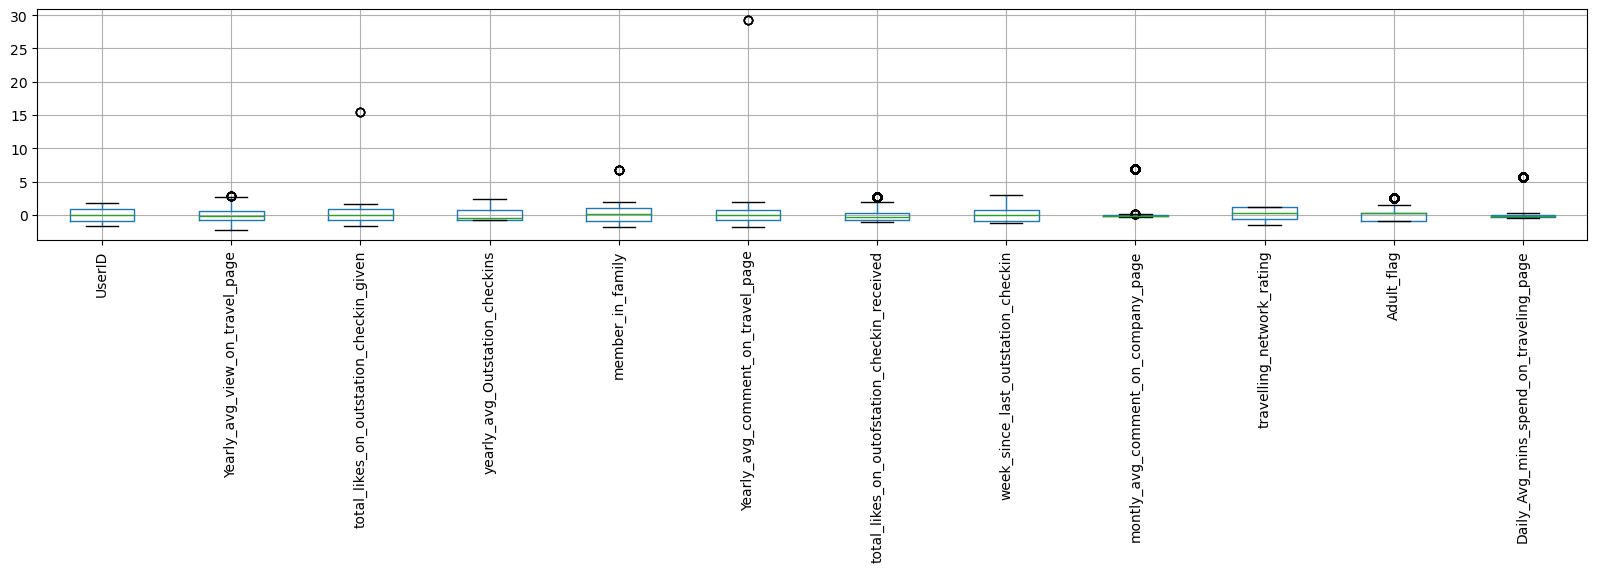

In [59]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


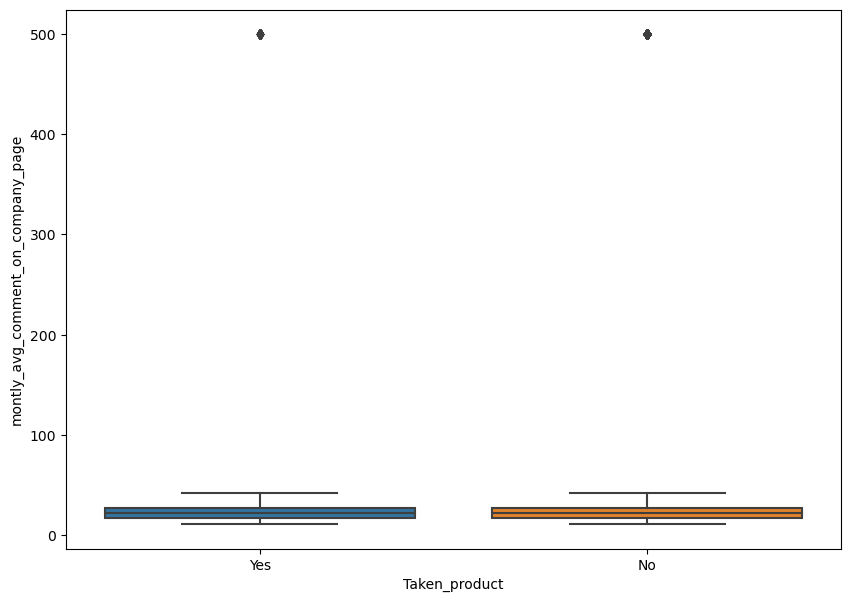

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(dataset["Taken_product"],df_num["montly_avg_comment_on_company_page"]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


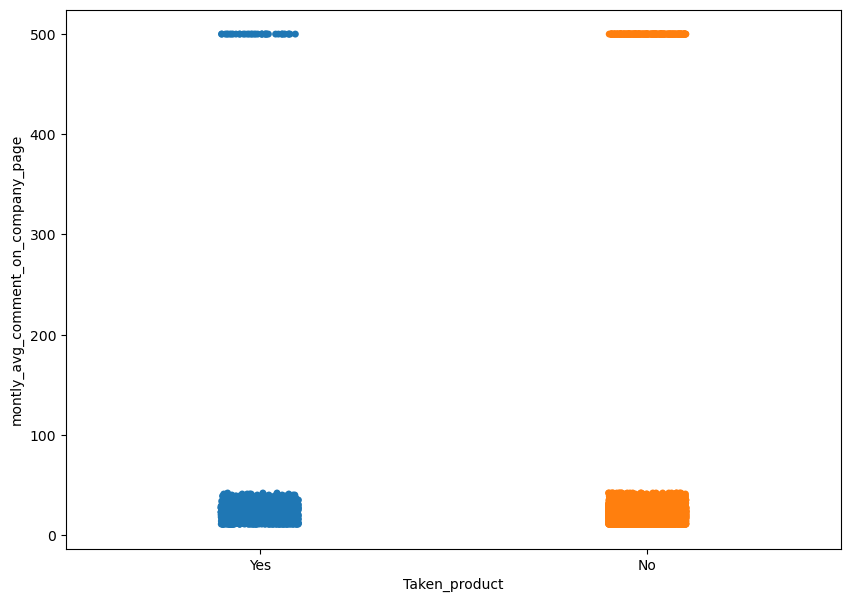

In [61]:
plt.figure(figsize=(10,7))
sns.stripplot(dataset["Taken_product"], df_num['montly_avg_comment_on_company_page'], jitter=True)  ### Distribution of values
plt.show()

# Bivariate Numeric vs Numeric

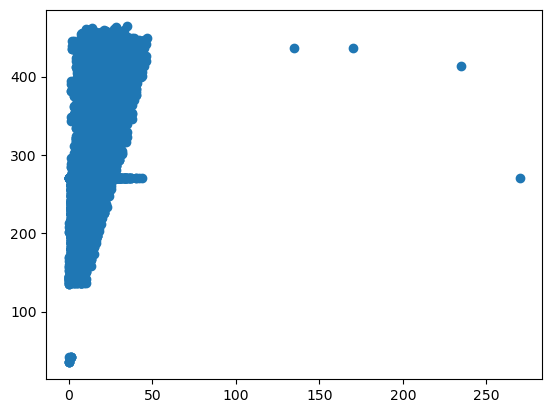

In [62]:
plt.scatter(dataset['Daily_Avg_mins_spend_on_traveling_page'],dataset['Yearly_avg_view_on_travel_page'])

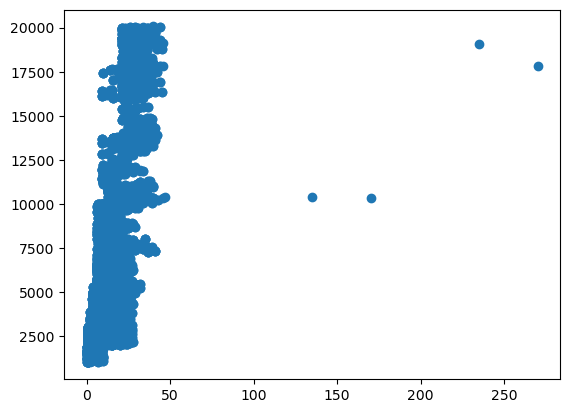

In [63]:
plt.scatter(df['Daily_Avg_mins_spend_on_traveling_page'],df['total_likes_on_outofstation_checkin_received'])

# Multivariate Analysis

<AxesSubplot:xlabel='Taken_product', ylabel='member_in_family'>

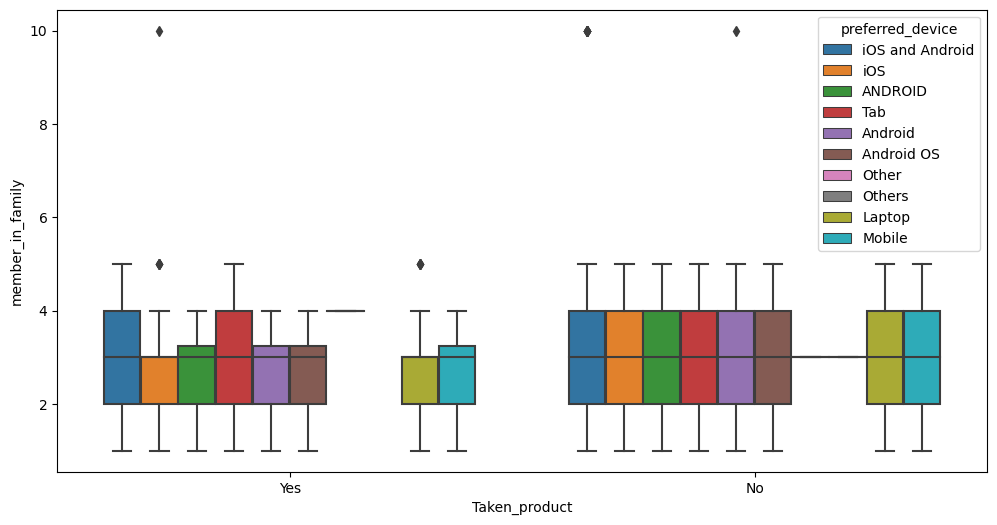

In [64]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Taken_product', y='member_in_family', hue='preferred_device',data=dataset)

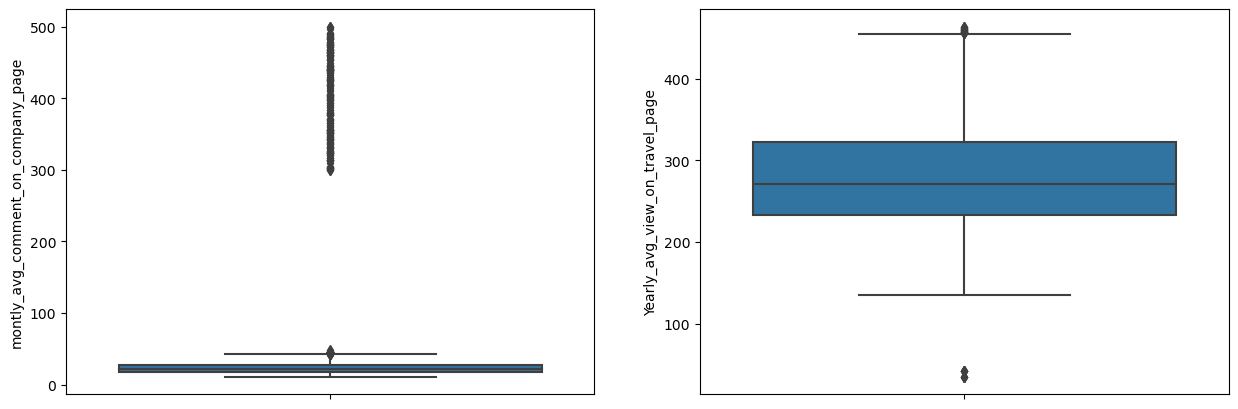

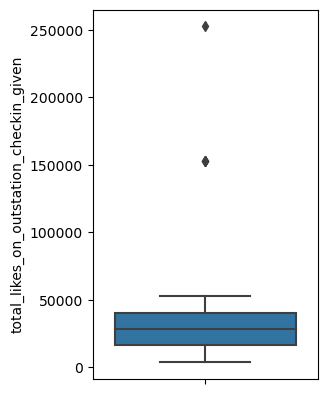

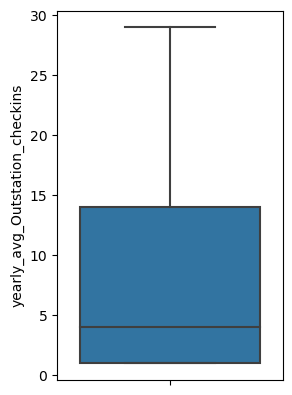

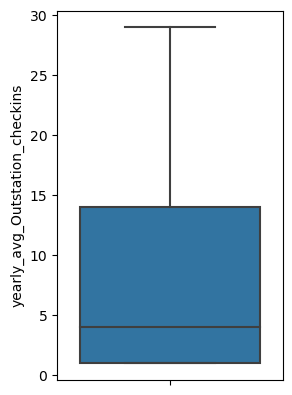

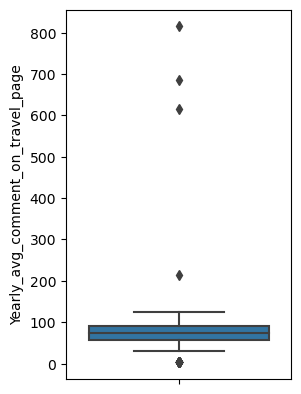

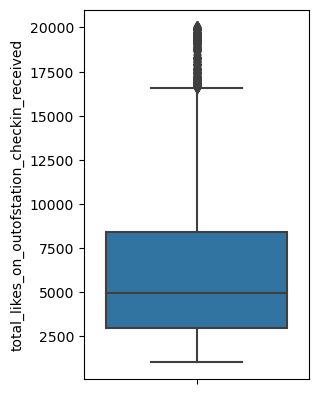

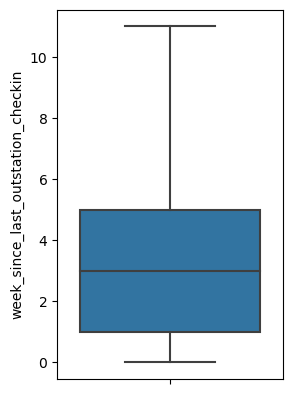

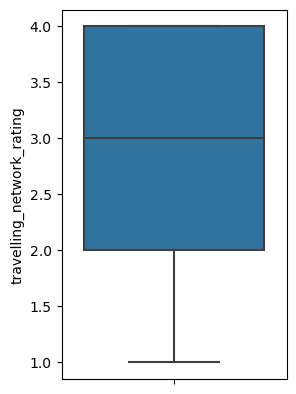

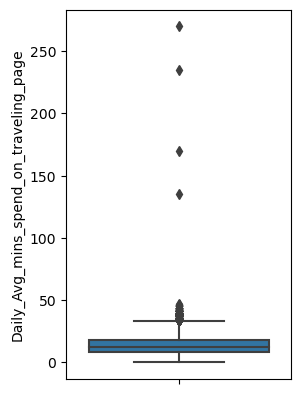

In [65]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = dataset['montly_avg_comment_on_company_page'])

plt.subplot(1,2,2)
sns.boxplot(y = dataset['Yearly_avg_view_on_travel_page'])
plt.show()

plt.subplot(1,2,2)
sns.boxplot(y = dataset['total_likes_on_outstation_checkin_given'])
plt.show()

plt.subplot(1,2,2)
sns.boxplot(y = dataset['yearly_avg_Outstation_checkins'])
plt.show()


plt.subplot(1,2,2)
sns.boxplot(y = dataset['yearly_avg_Outstation_checkins'])
plt.show()

plt.subplot(1,2,2)
sns.boxplot(y = dataset['Yearly_avg_comment_on_travel_page'])
plt.show()

plt.subplot(1,2,2)
sns.boxplot(y = dataset['total_likes_on_outofstation_checkin_received'])
plt.show()


plt.subplot(1,2,2)
sns.boxplot(y = dataset['week_since_last_outstation_checkin'])
plt.show()

plt.subplot(1,2,2)
sns.boxplot(y = dataset['travelling_network_rating'])
plt.show()

plt.subplot(1,2,2)
sns.boxplot(y = dataset['Daily_Avg_mins_spend_on_traveling_page'])
plt.show()


In [66]:
dataset.describe()

UserID  Yearly_avg_view_on_travel_page  \
count  1.176000e+04                    11760.000000   
mean   1.005880e+06                      280.345153   
std    3.394964e+03                       66.511330   
min    1.000001e+06                       35.000000   
25%    1.002941e+06                      233.000000   
50%    1.005880e+06                      271.000000   
75%    1.008820e+06                      322.000000   
max    1.011760e+06                      464.000000   

       total_likes_on_outstation_checkin_given  \
count                             11760.000000   
mean                              28167.420748   
std                               14150.080463   
min                                3570.000000   
25%                               16697.250000   
50%                               28076.000000   
75%                               40115.250000   
max                              252430.000000   

       yearly_avg_Outstation_checkins  member_in_family  \
count                    11760.000000      11760.000000   
mean                         8.223554          2.921344   
std                          8.644327          1.044883   
min                          1.000000          1.000000   
25%                          1.000000          2.000000   
50%                          4.000000          3.000000   
75%                         14.000000          4.000000   
max                         29.000000         10.000000   

       Yearly_avg_comment_on_travel_page  \
count                       11760.000000   
mean                           74.793707   
std                            23.815280   
min                             3.000000   
25%                            57.000000   
50%                            75.000000   
75%                            92.000000   
max                           815.000000   

       total_likes_on_outofstation_checkin_received  \
count                                  11760.000000   
mean                                    6531.699065   
std                                     4706.613785   
min                                     1009.000000   
25%                                     2940.750000   
50%                                     4948.000000   
75%                                     8393.250000   
max                                    20065.000000   

       week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
count                        11760.000000                        11760.000000   
mean                             3.203571                           28.661565   
std                              2.616365                           48.660504   
min                              0.000000                           11.000000   
25%                              1.000000                           17.000000   
50%                              3.000000                           22.000000   
75%                              5.000000                           27.000000   
max                             11.000000                          500.000000   

       travelling_network_rating    Adult_flag  \
count               11760.000000  11760.000000   
mean                    2.712245      0.793878   
std                     1.080887      0.851823   
min                     1.000000      0.000000   
25%                     2.000000      0.000000   
50%                     3.000000      1.000000   
75%                     4.000000      1.000000   
max                     4.000000      3.000000   

       Daily_Avg_mins_spend_on_traveling_page  
count                            11760.000000  
mean                                13.817432  
std                                  9.070657  
min                                  0.000000  
25%                                  8.000000  
50%                                 12.000000  
75%                                 18.000000  
max                                270.000000

In [67]:
dataset.duplicated().sum()

0

In [68]:
cust_dataset=dataset.drop(['UserID','Taken_product','preferred_device','preferred_location_type','following_company_page','working_flag'],axis=1)

In [69]:
cust_dataset.head()

Yearly_avg_view_on_travel_page  total_likes_on_outstation_checkin_given  \
0                           307.0                                  38570.0   
1                           367.0                                   9765.0   
2                           277.0                                  48055.0   
3                           247.0                                  48720.0   
4                           202.0                                  20685.0   

   yearly_avg_Outstation_checkins  member_in_family  \
0                             1.0               2.0   
1                             1.0               1.0   
2                             1.0               2.0   
3                             1.0               4.0   
4                             1.0               1.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
0                                   8                                  11   
1                                   1                                  23   
2                                   6                                  15   
3                                   1                                  11   
4                                   9                                  12   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  
0                                       8  
1                                      10  
2                                       7  
3                                       8  
4                                       6

Scaling the data

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
X = StandardScaler()

In [72]:
scaled_df = X.fit_transform(cust_dataset)

In [73]:
scaled_df

array([[ 0.40077353,  0.73519169, -0.83567648, ..., -1.58417824,
        -0.93201439, -0.64137356],
       [ 1.30291384, -1.30057234, -0.83567648, ...,  1.19143799,
         0.24198831, -0.42087298],
       [-0.05029662,  1.4055344 , -0.83567648, ..., -0.65897283,
        -0.93201439, -0.75162385],
       ...,
       [-0.99754395, -1.60355169, -0.48861331, ..., -0.65897283,
         0.24198831, -0.2003724 ],
       [ 1.52844891,  0.54302914, -0.71998876, ...,  1.19143799,
        -0.93201439,  0.68162992],
       [-0.15554633, -0.43410933, -0.0258624 , ..., -1.58417824,
        -0.93201439,  0.02012818]])

In [74]:
k_means = KMeans(n_clusters = 2)


In [75]:
k_means.fit(scaled_df)


KMeans(n_clusters=2)

In [76]:
k_means.labels_

array([0, 0, 0, ..., 0, 1, 0])

In [77]:
k_means.inertia_

111614.05665133295

In [78]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

103455.08778004874

In [79]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

97387.44516471044

In [80]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

129360.00000000003

In [81]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

86667.8225027693

In [82]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

82020.93101351833

In [83]:
k_means = KMeans(n_clusters = 25)
k_means.fit(scaled_df)
k_means.inertia_

55326.86380219501

In [84]:
wss =[] 

In [85]:
for i in range(1,25):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [86]:
wss

[129360.00000000003,
 111613.73043108509,
 100617.98903427763,
 92585.98607941109,
 86825.08445975321,
 82020.96949489835,
 78151.6476988149,
 75513.50743085334,
 73381.9893459016,
 71883.95646969635,
 69888.1931239186,
 68166.62254629307,
 67205.34932994001,
 65835.88615761319,
 64781.5569905639,
 63445.04589882027,
 62085.41194862632,
 61437.41548812994,
 60173.35211298615,
 59526.53190368791,
 58186.96547397342,
 57291.67847273196,
 56738.38794882297,
 56014.22223742923]

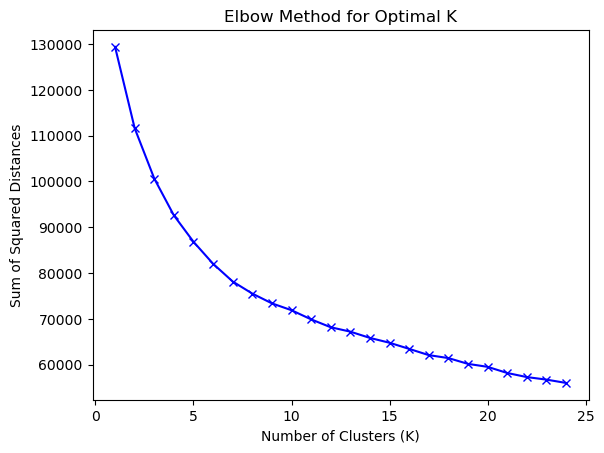

In [87]:
# Plot the elbow curve
#plt.plot(k_values, ssd, 'bx-')
plt.plot(range(1,25), wss,'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

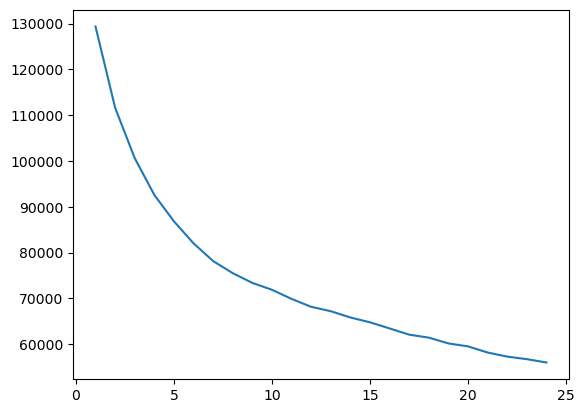

In [88]:
plt.plot(range(1,25), wss)

In [89]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
labels=k_means.labels_

In [90]:
cust_dataset["Clus_Kmeans"]=labels
cust_dataset.head()

Yearly_avg_view_on_travel_page  total_likes_on_outstation_checkin_given  \
0                           307.0                                  38570.0   
1                           367.0                                   9765.0   
2                           277.0                                  48055.0   
3                           247.0                                  48720.0   
4                           202.0                                  20685.0   

   yearly_avg_Outstation_checkins  member_in_family  \
0                             1.0               2.0   
1                             1.0               1.0   
2                             1.0               2.0   
3                             1.0               4.0   
4                             1.0               1.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
0                                   8                                  11   
1                                   1                                  23   
2                                   6                                  15   
3                                   1                                  11   
4                                   9                                  12   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  Clus_Kmeans  
0                                       8            3  
1                                      10            1  
2                                       7            3  
3                                       8            1  
4                                       6            3

In [91]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [92]:
silhouette_score(scaled_df,labels)

0.12393748755812517

In [93]:
sil_width=silhouette_samples(scaled_df,labels)

In [94]:
cust_dataset["sil_width"]=sil_width
cust_dataset.head()

Yearly_avg_view_on_travel_page  total_likes_on_outstation_checkin_given  \
0                           307.0                                  38570.0   
1                           367.0                                   9765.0   
2                           277.0                                  48055.0   
3                           247.0                                  48720.0   
4                           202.0                                  20685.0   

   yearly_avg_Outstation_checkins  member_in_family  \
0                             1.0               2.0   
1                             1.0               1.0   
2                             1.0               2.0   
3                             1.0               4.0   
4                             1.0               1.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
0                                   8                                  11   
1                                   1                                  23   
2                                   6                                  15   
3                                   1                                  11   
4                                   9                                  12   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  Clus_Kmeans  sil_width  
0                                       8            3   0.100096  
1                                      10            1   0.115582  
2                                       7            3  -0.002439  
3                                       8            1   0.176321  
4                                       6            3  -0.004461

In [95]:
silhouette_samples(scaled_df,labels).min()

-0.06286909599167

In [96]:
cust_dataset.to_csv('km.csv')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


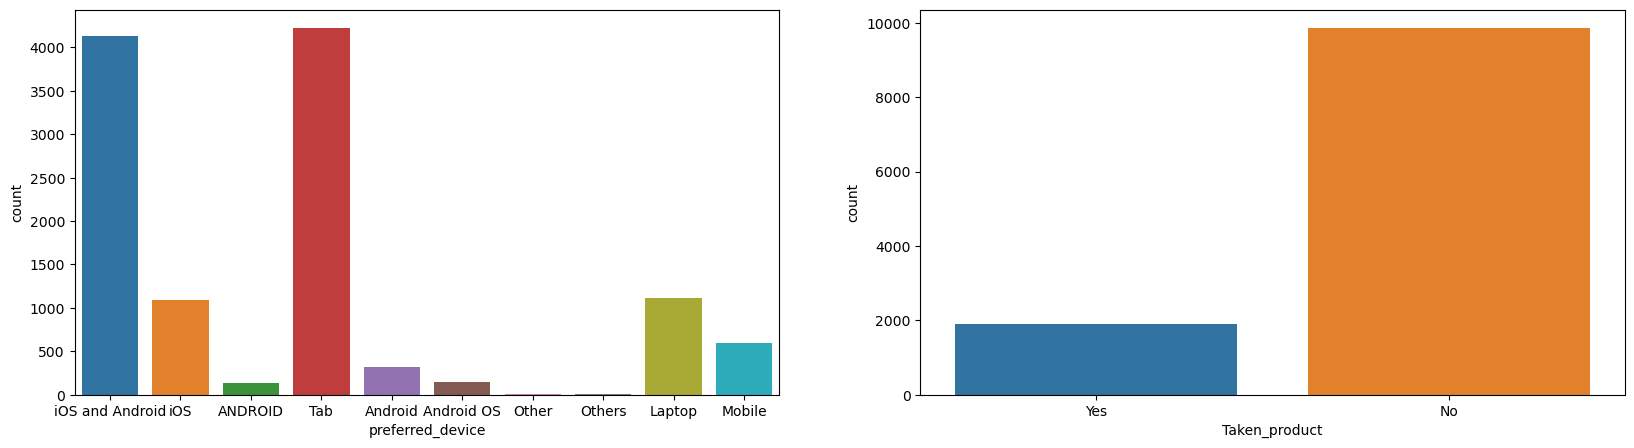

In [97]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.countplot(dataset['preferred_device'])

plt.subplot(1,2,2)
sns.countplot(dataset['Taken_product'])
plt.show()

In [98]:
#replace values for Null values
dataset['preferred_device'].replace('iOS and Android','Mobile',inplace=True)
dataset['preferred_device'].replace('iOS','Mobile',inplace=True)
dataset['preferred_device'].replace('ANDROID','Mobile',inplace=True)
dataset['preferred_device'].replace('Android OS','Mobile',inplace=True)
dataset['preferred_device'].replace('Other','Mobile',inplace=True)
dataset['preferred_device'].replace('Others','Mobile',inplace=True)
dataset['preferred_device'].replace('Tab','Mobile',inplace=True)
dataset['preferred_device'].replace('Android','Mobile',inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


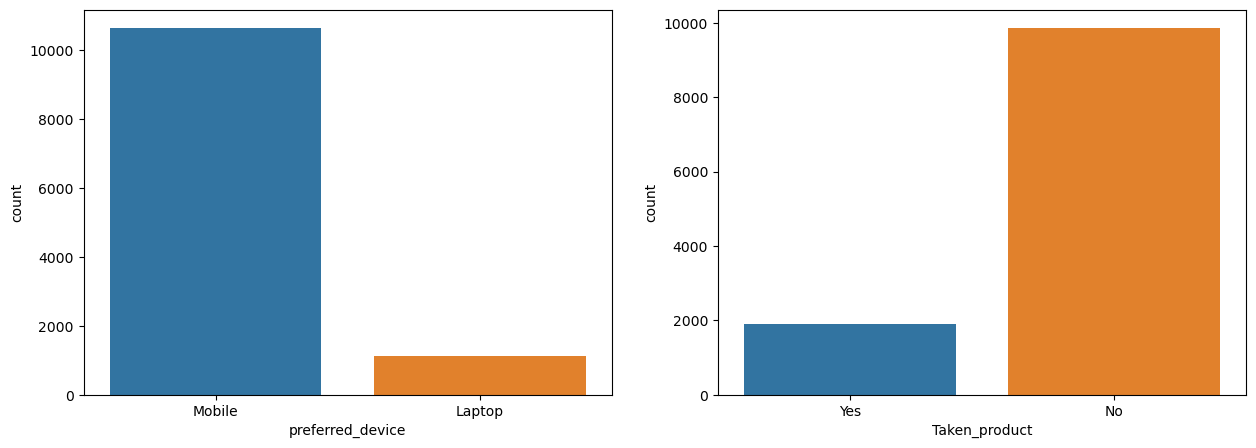

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


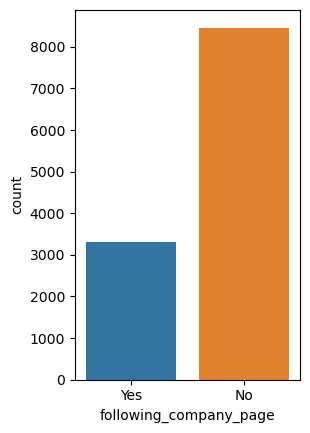

In [99]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(dataset['preferred_device'])

plt.subplot(1,2,2)
sns.countplot(dataset['Taken_product'])
plt.show()

plt.subplot(1,2,2)
sns.countplot(dataset['following_company_page'])
plt.show()


In [100]:
dataset["preferred_device"].value_counts()

Mobile    10652
Laptop     1108
Name: preferred_device, dtype: int64

In [101]:
dataset["Taken_product"].value_counts()

No     9864
Yes    1896
Name: Taken_product, dtype: int64

#Checking proportion of Taken product

In [102]:
dataset["Taken_product"].value_counts(normalize = True)

No     0.838776
Yes    0.161224
Name: Taken_product, dtype: float64

In [103]:
dataset["preferred_device"].value_counts(normalize = True)

Mobile    0.905782
Laptop    0.094218
Name: preferred_device, dtype: float64

In [104]:
dataset["preferred_device"].value_counts()

Mobile    10652
Laptop     1108
Name: preferred_device, dtype: int64

array([[<AxesSubplot:title={'center':'UserID'}>,
        <AxesSubplot:title={'center':'Yearly_avg_view_on_travel_page'}>,
        <AxesSubplot:title={'center':'total_likes_on_outstation_checkin_given'}>],
       [<AxesSubplot:title={'center':'yearly_avg_Outstation_checkins'}>,
        <AxesSubplot:title={'center':'member_in_family'}>,
        <AxesSubplot:title={'center':'Yearly_avg_comment_on_travel_page'}>],
       [<AxesSubplot:title={'center':'total_likes_on_outofstation_checkin_received'}>,
        <AxesSubplot:title={'center':'week_since_last_outstation_checkin'}>,
        <AxesSubplot:title={'center':'montly_avg_comment_on_company_page'}>],
       [<AxesSubplot:title={'center':'travelling_network_rating'}>,
        <AxesSubplot:title={'center':'Adult_flag'}>,
        <AxesSubplot:title={'center':'Daily_Avg_mins_spend_on_traveling_page'}>]],
      dtype=object)

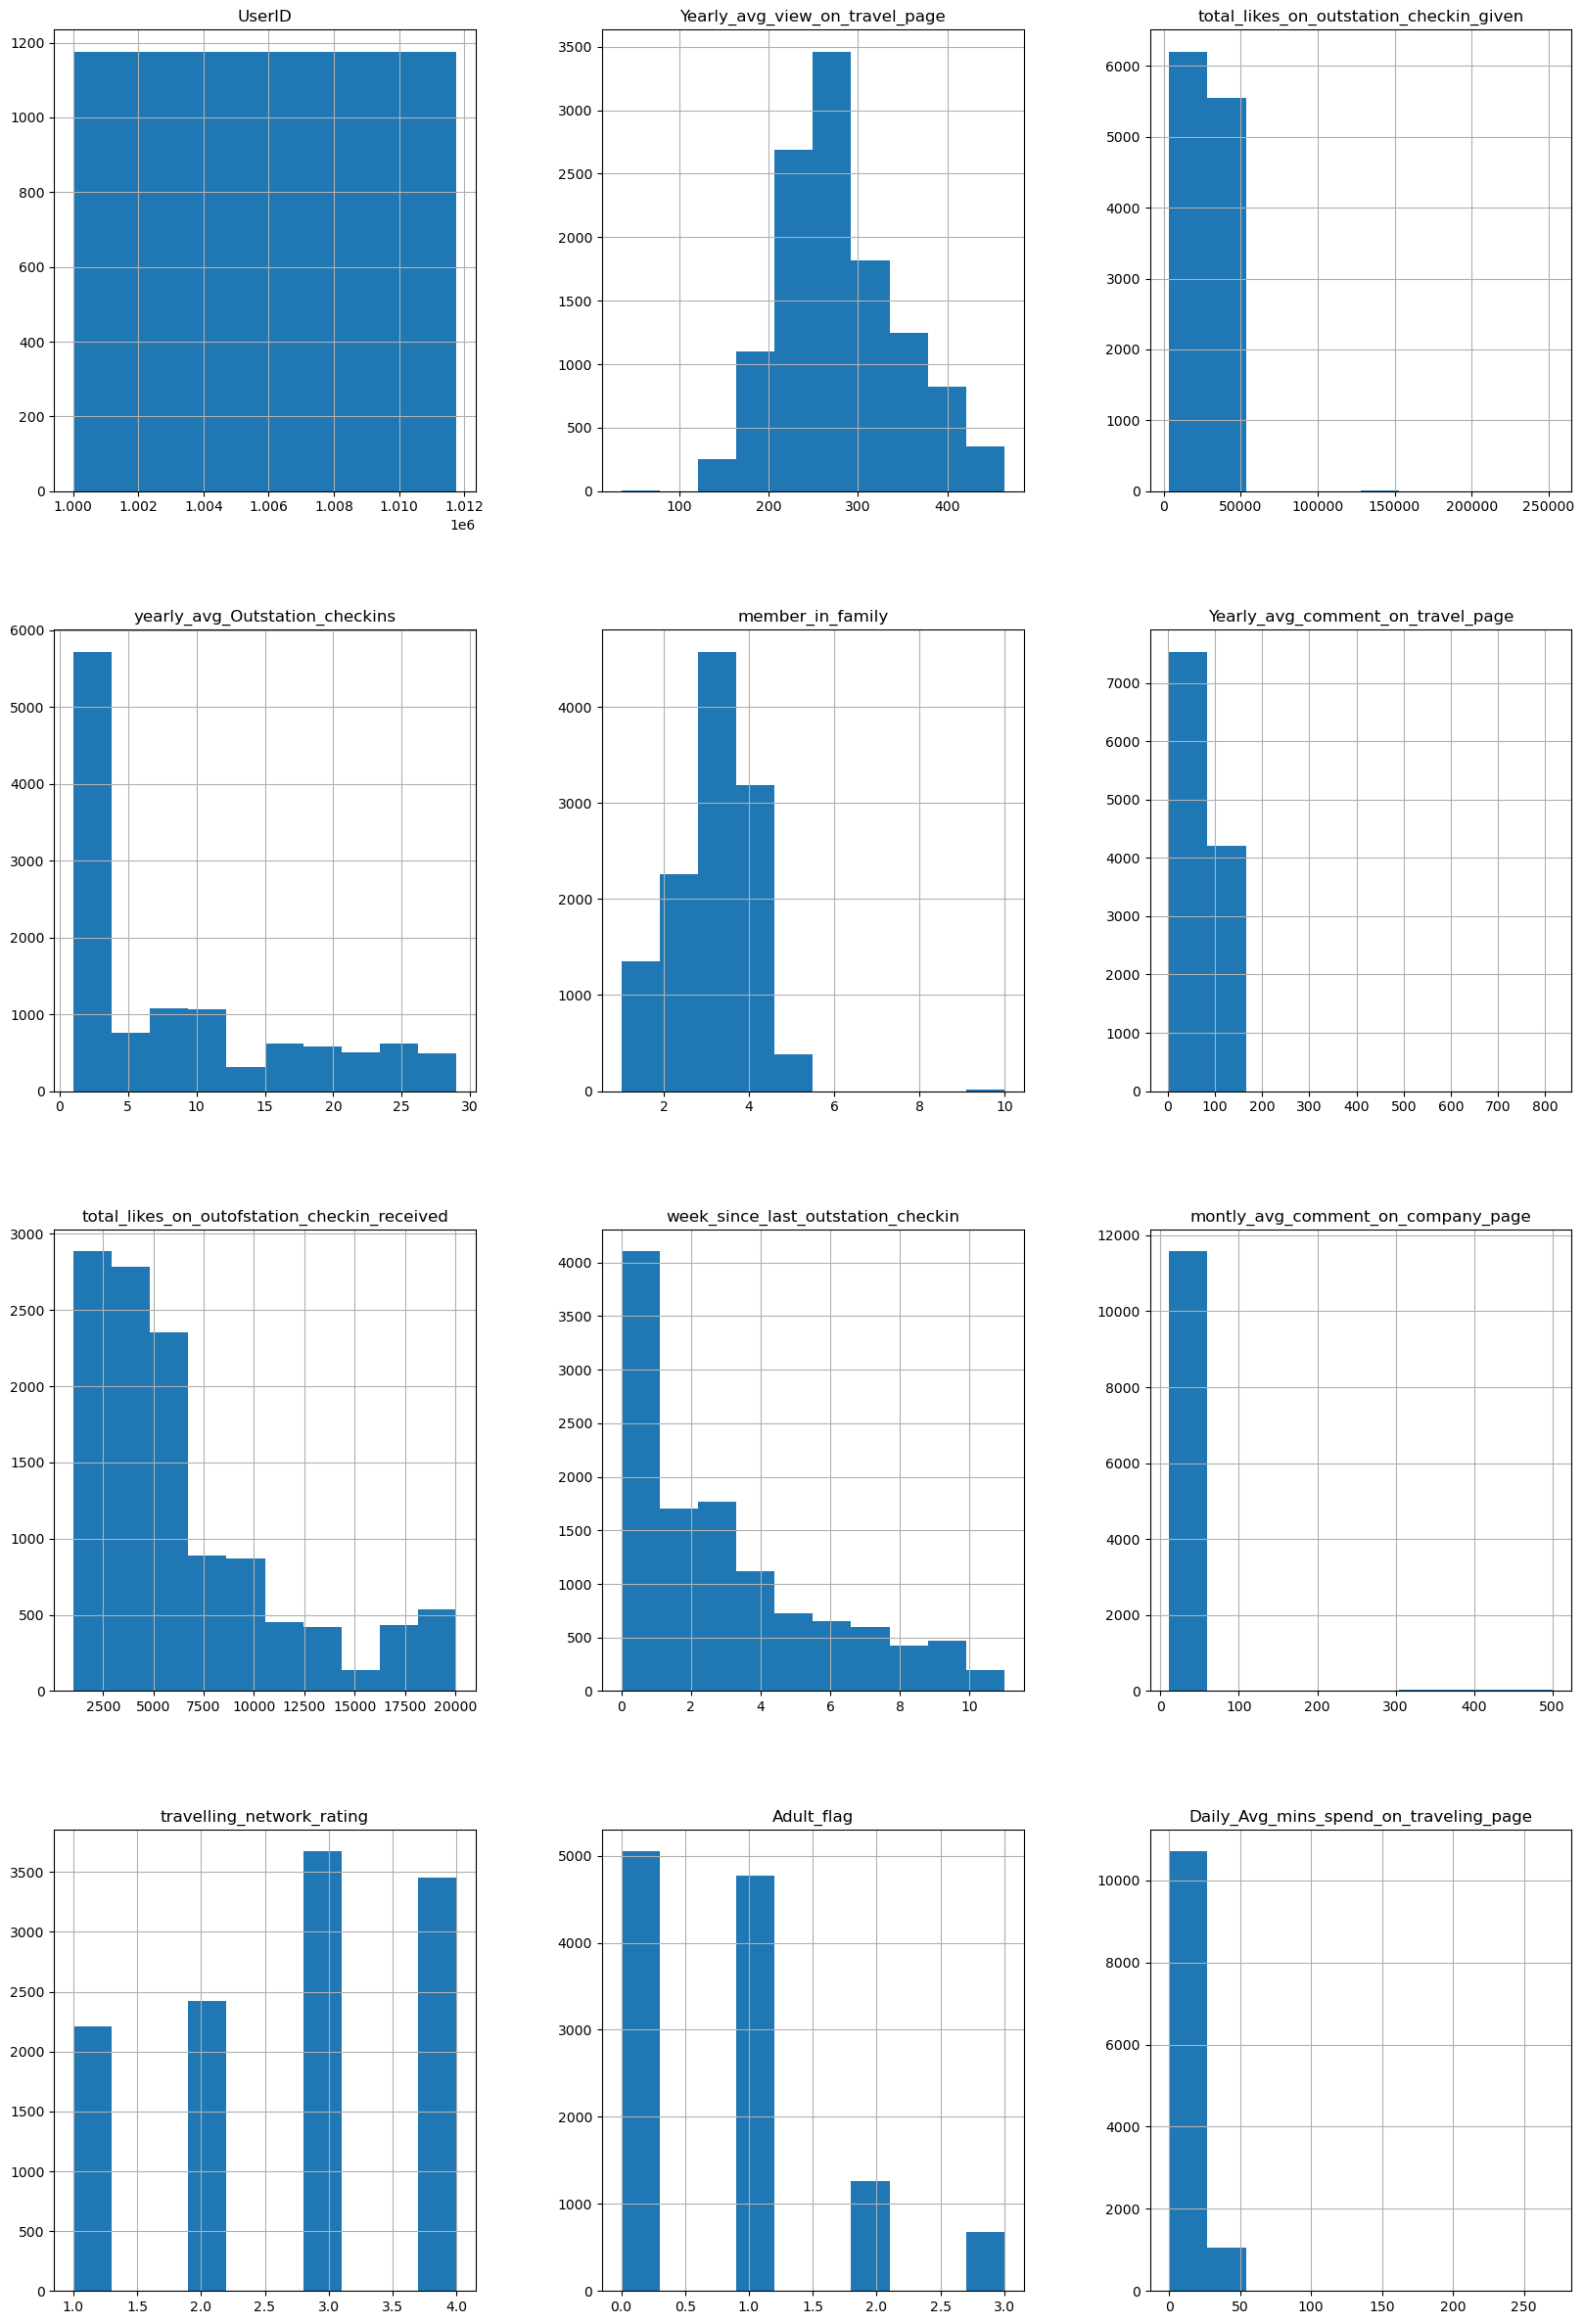

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

dataset.hist(figsize=(20,30))

In [106]:
import seaborn as sns

<AxesSubplot:xlabel='following_company_page', ylabel='montly_avg_comment_on_company_page'>

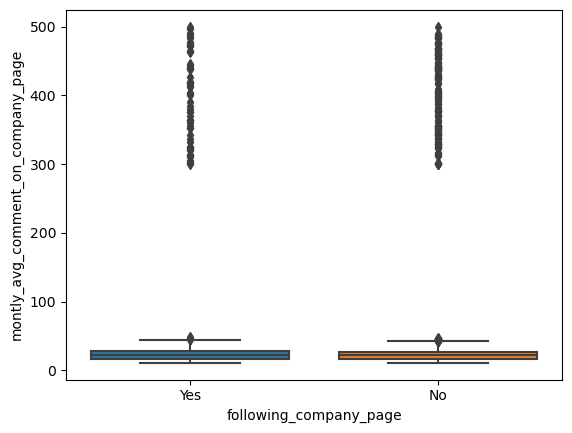

In [107]:
sns.boxplot(x="following_company_page",y="montly_avg_comment_on_company_page",data=dataset)

<AxesSubplot:xlabel='preferred_device', ylabel='count'>

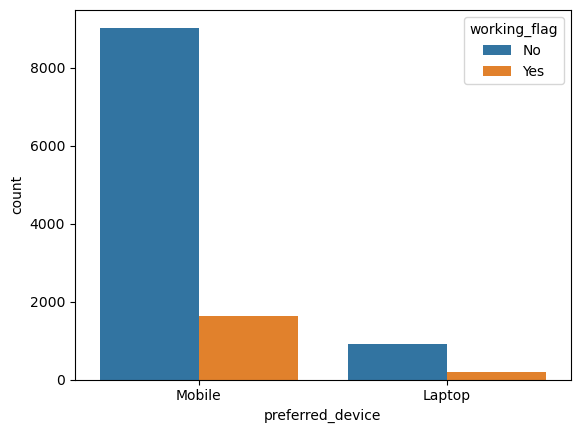

In [108]:
sns.countplot(x='preferred_device', hue='working_flag', data=dataset)


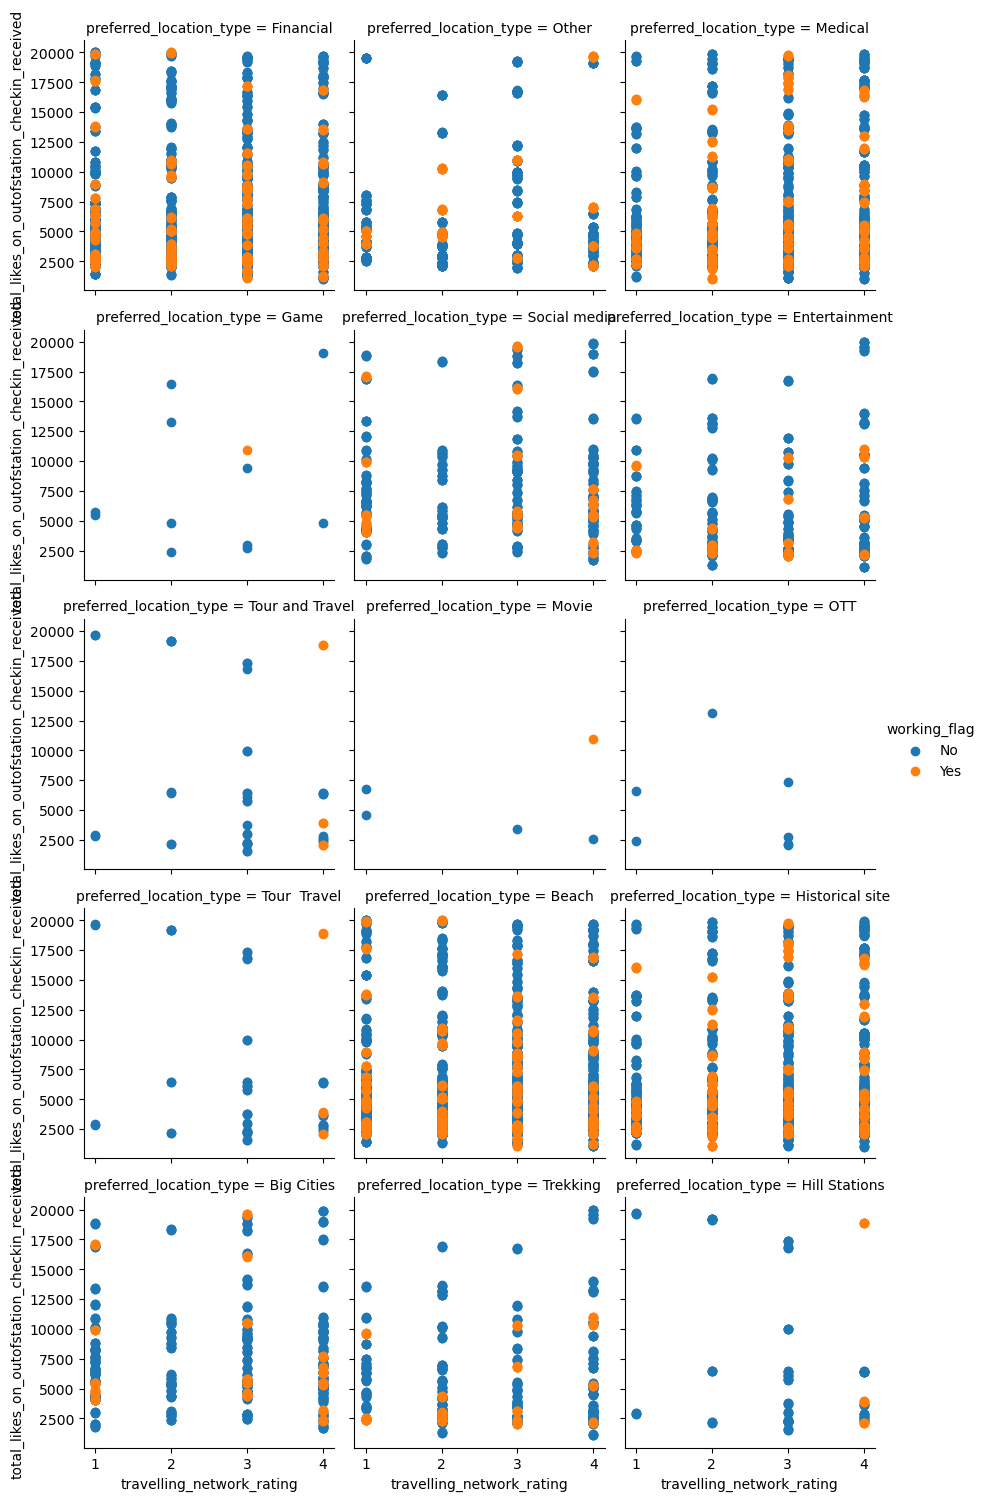

In [109]:
g = sns.FacetGrid(df, col="preferred_location_type", hue='working_flag',col_wrap=3, height=3)
g = g.map(plt.scatter, "travelling_network_rating", 'total_likes_on_outofstation_checkin_received')
g.add_legend()

<AxesSubplot:xlabel='preferred_location_type', ylabel='count'>

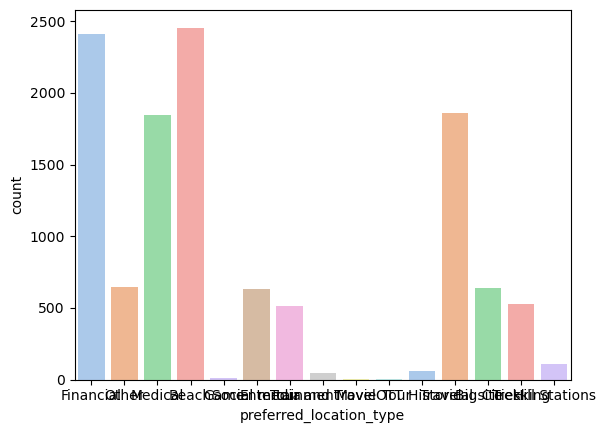

In [110]:

sns.countplot(x='preferred_location_type', data=dataset, palette='pastel')


<AxesSubplot:>

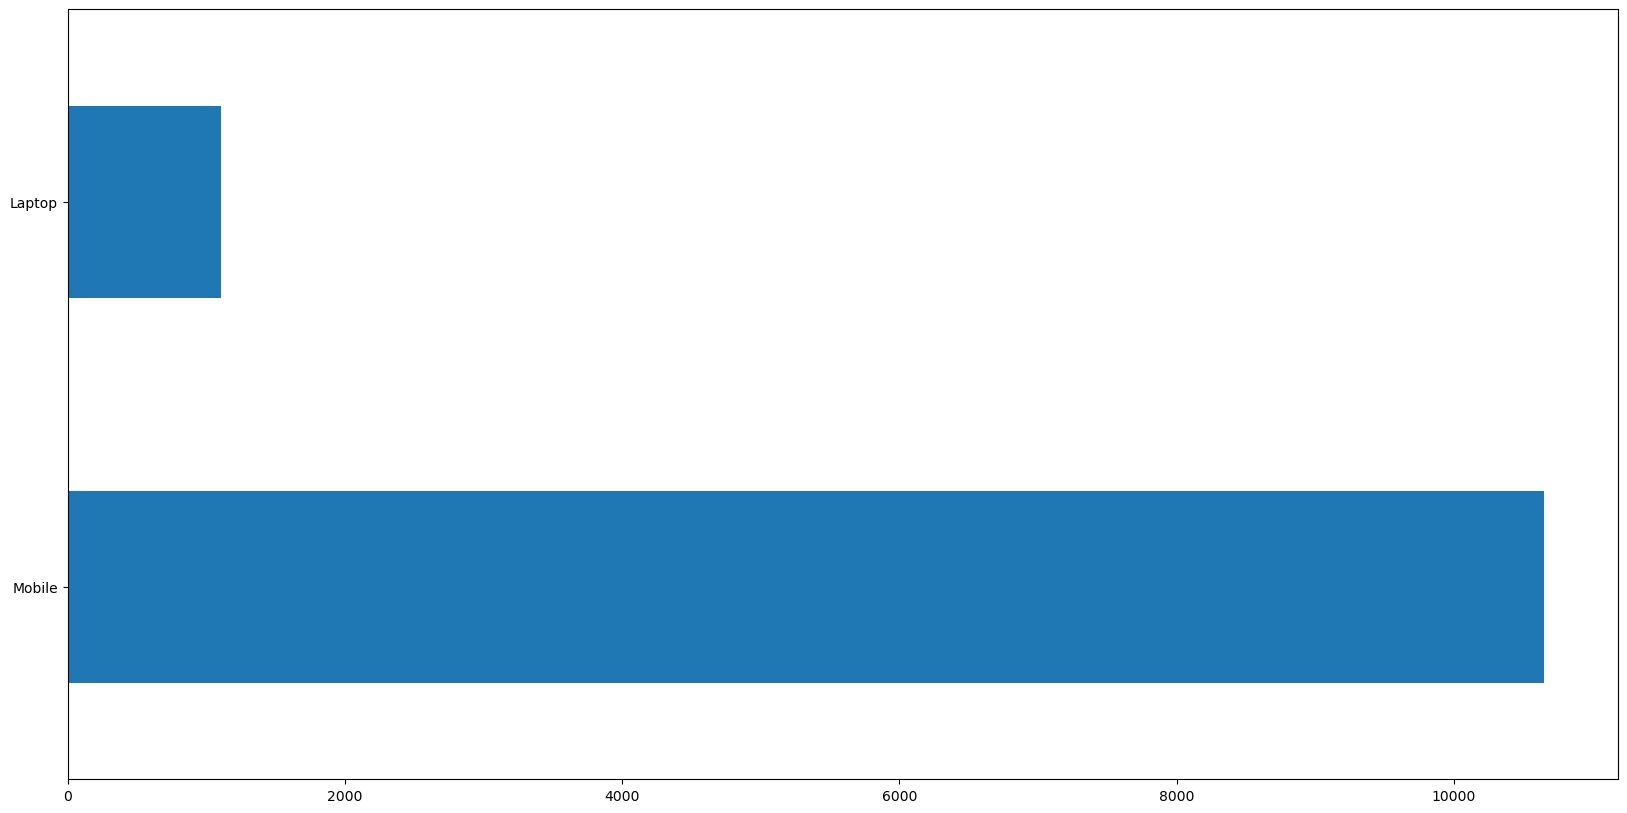

In [111]:
dataset['preferred_device'].value_counts().head(30).plot(kind='barh', figsize=(20,10))


In [112]:
pd.crosstab(dataset['preferred_location_type'], dataset['member_in_family'], margins=True, normalize = False)

member_in_family          1.0   2.0   3.0   4.0  5.0  10.0    All
preferred_location_type                                          
Beach                     268   468   950   699   70     0   2455
Big Cities                 56    96   236   208   40     0    636
Entertainment              74    85   223   121   12     1    516
Financial                 263   462   925   688   66     5   2409
Game                        0     2     4     6    0     0     12
Hill Stations               8     8    64    20    8     0    108
Historical site           252   396   732   416   60     0   1856
Medical                   247   394   725   414   60     5   1845
Movie                       1     1     1     2    0     0      5
OTT                         0     2     4     1    0     0      7
Other                      40   150   187   258    8     0    643
Social media               56    96   234   207   40     0    633
Tour  Travel                4     6    35    11    4     0     60
Tour and Travel             4     2    28     9    4     0     47
Trekking                   76    88   228   124   12     0    528
All                      1349  2256  4576  3184  384    11  11760

In [113]:
pd.crosstab(dataset['preferred_location_type'], dataset['Taken_product'], margins=True, normalize = False)

Taken_product              No   Yes    All
preferred_location_type                   
Beach                    2096   359   2455
Big Cities                496   140    636
Entertainment             393   123    516
Financial                2055   354   2409
Game                       11     1     12
Hill Stations              80    28    108
Historical site          1604   252   1856
Medical                  1593   252   1845
Movie                       4     1      5
OTT                         3     4      7
Other                     556    87    643
Social media              494   139    633
Tour  Travel               46    14     60
Tour and Travel            33    14     47
Trekking                  400   128    528
All                      9864  1896  11760

In [114]:
pd.crosstab(dataset['member_in_family'], dataset['Taken_product'], margins=True, normalize = False)

Taken_product       No   Yes    All
member_in_family                   
1.0               1102   247   1349
2.0               1904   352   2256
3.0               3784   792   4576
4.0               2720   464   3184
5.0                344    40    384
10.0                10     1     11
All               9864  1896  11760

<AxesSubplot:xlabel='Taken_product', ylabel='count'>

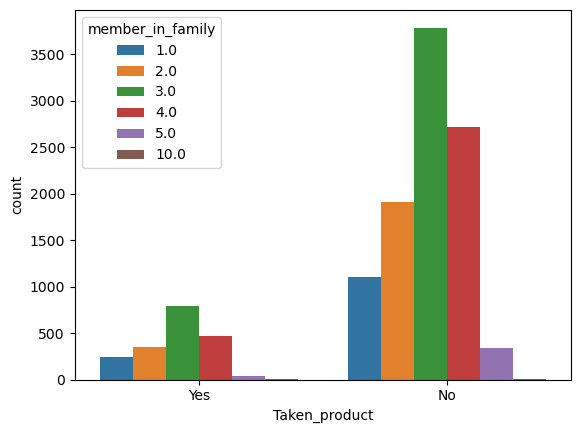

In [115]:
sns.countplot(x='Taken_product', hue='member_in_family', data=dataset)


<AxesSubplot:xlabel='Daily_Avg_mins_spend_on_traveling_page'>

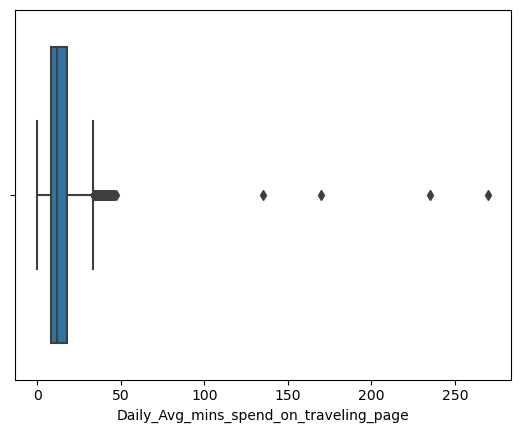

In [116]:
sns.boxplot(x=dataset.Daily_Avg_mins_spend_on_traveling_page)

<AxesSubplot:xlabel='Yearly_avg_view_on_travel_page'>

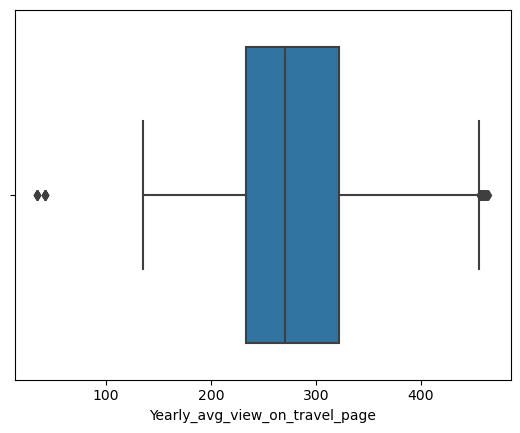

In [117]:
sns.boxplot(x=dataset.Yearly_avg_view_on_travel_page)

<AxesSubplot:xlabel='total_likes_on_outofstation_checkin_received'>

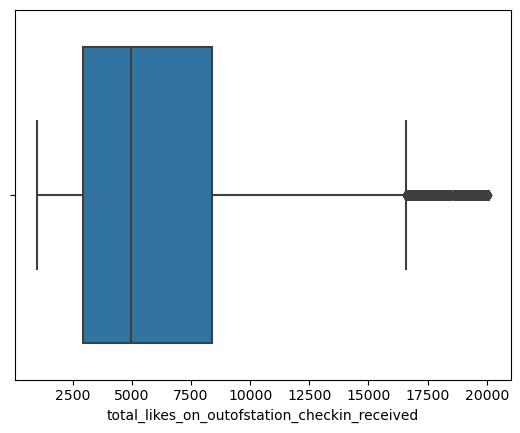

In [118]:
sns.boxplot(x=dataset.total_likes_on_outofstation_checkin_received)

In [119]:
dataset=dataset.drop(['UserID'],axis=1)

In [120]:
corr = dataset.corr()
round(corr,2)

Yearly_avg_view_on_travel_page  \
Yearly_avg_view_on_travel_page                                          1.00   
total_likes_on_outstation_checkin_given                                 0.01   
yearly_avg_Outstation_checkins                                          0.01   
member_in_family                                                        0.19   
Yearly_avg_comment_on_travel_page                                       0.04   
total_likes_on_outofstation_checkin_received                            0.48   
week_since_last_outstation_checkin                                      0.28   
montly_avg_comment_on_company_page                                     -0.01   
travelling_network_rating                                               0.06   
Adult_flag                                                              0.04   
Daily_Avg_mins_spend_on_traveling_page                                  0.58   

                                              total_likes_on_outstation_checkin_given  \
Yearly_avg_view_on_travel_page                                                   0.01   
total_likes_on_outstation_checkin_given                                          1.00   
yearly_avg_Outstation_checkins                                                   0.01   
member_in_family                                                                -0.01   
Yearly_avg_comment_on_travel_page                                                0.01   
total_likes_on_outofstation_checkin_received                                     0.01   
week_since_last_outstation_checkin                                               0.03   
montly_avg_comment_on_company_page                                               0.01   
travelling_network_rating                                                        0.01   
Adult_flag                                                                       0.04   
Daily_Avg_mins_spend_on_traveling_page                                           0.01   

                                              yearly_avg_Outstation_checkins  \
Yearly_avg_view_on_travel_page                                          0.01   
total_likes_on_outstation_checkin_given                                 0.01   
yearly_avg_Outstation_checkins                                          1.00   
member_in_family                                                        0.02   
Yearly_avg_comment_on_travel_page                                       0.05   
total_likes_on_outofstation_checkin_received                           -0.01   
week_since_last_outstation_checkin                                     -0.03   
montly_avg_comment_on_company_page                                     -0.00   
travelling_network_rating                                               0.00   
Adult_flag                                                              0.05   
Daily_Avg_mins_spend_on_traveling_page                                  0.01   

                                              member_in_family  \
Yearly_avg_view_on_travel_page                            0.19   
total_likes_on_outstation_checkin_given                  -0.01   
yearly_avg_Outstation_checkins                            0.02   
member_in_family                                          1.00   
Yearly_avg_comment_on_travel_page                         0.01   
total_likes_on_outofstation_checkin_received              0.09   
week_since_last_outstation_checkin                        0.11   
montly_avg_comment_on_company_page                       -0.01   
travelling_network_rating                                -0.01   
Adult_flag                                                0.02   
Daily_Avg_mins_spend_on_traveling_page                    0.12   

                                              Yearly_avg_comment_on_travel_page  \
Yearly_avg_view_on_travel_page                                             0.04   
total_likes_on_outstation_checkin_given                                    0.01   
yearly_avg_Ou

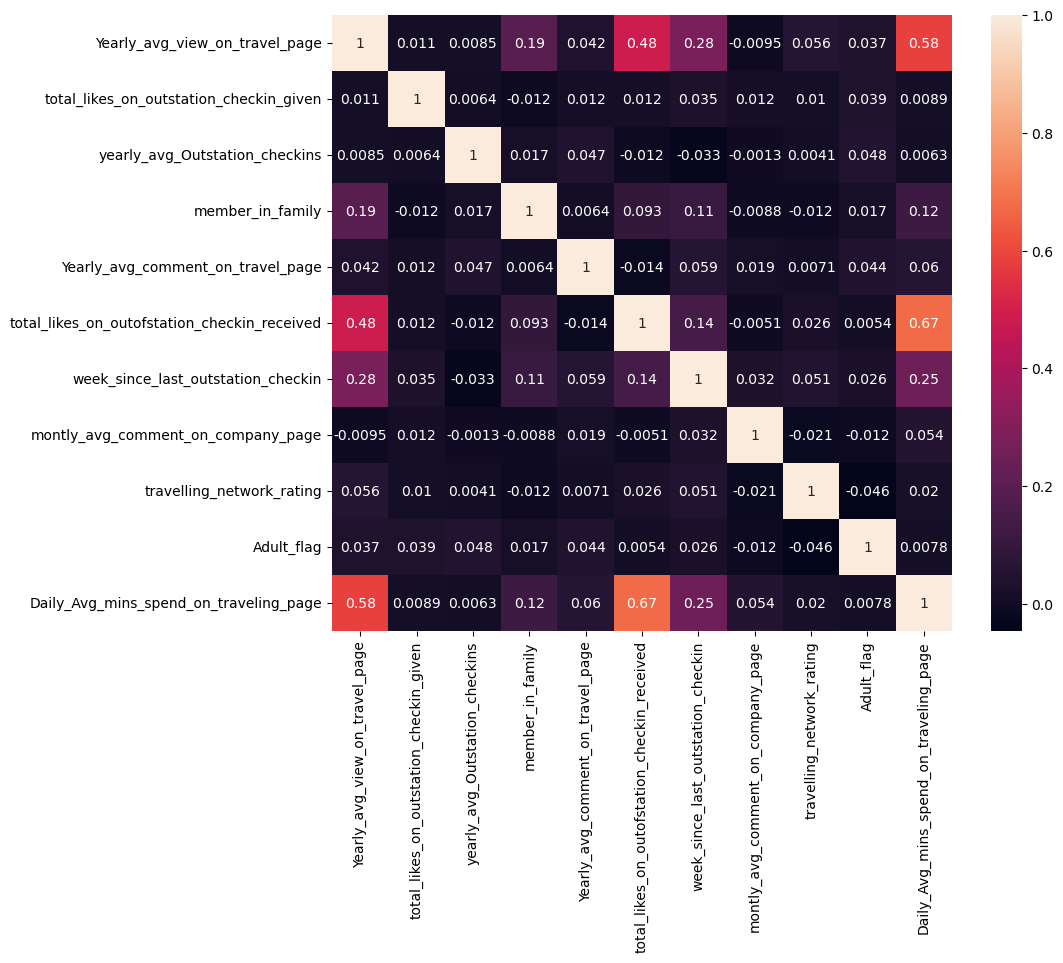

In [121]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [122]:
#dataset.drop(['Daily_Avg_mins_spend_on_traveling_page','Yearly_avg_view_on_travel_page'], axis = 1,inplace=True)

In [123]:
dataset.head()

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0           Yes                           307.0           Mobile   
1            No                           367.0           Mobile   
2           Yes                           277.0           Mobile   
3            No                           247.0           Mobile   
4            No                           202.0           Mobile   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                             1.0   
1                                   9765.0                             1.0   
2                                  48055.0                             1.0   
3                                  48720.0                             1.0   
4                                  20685.0                             1.0   

   member_in_family preferred_location_type  \
0               2.0               Financial   
1               1.0               Financial   
2               2.0                   Other   
3               4.0               Financial   
4               1.0                 Medical   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

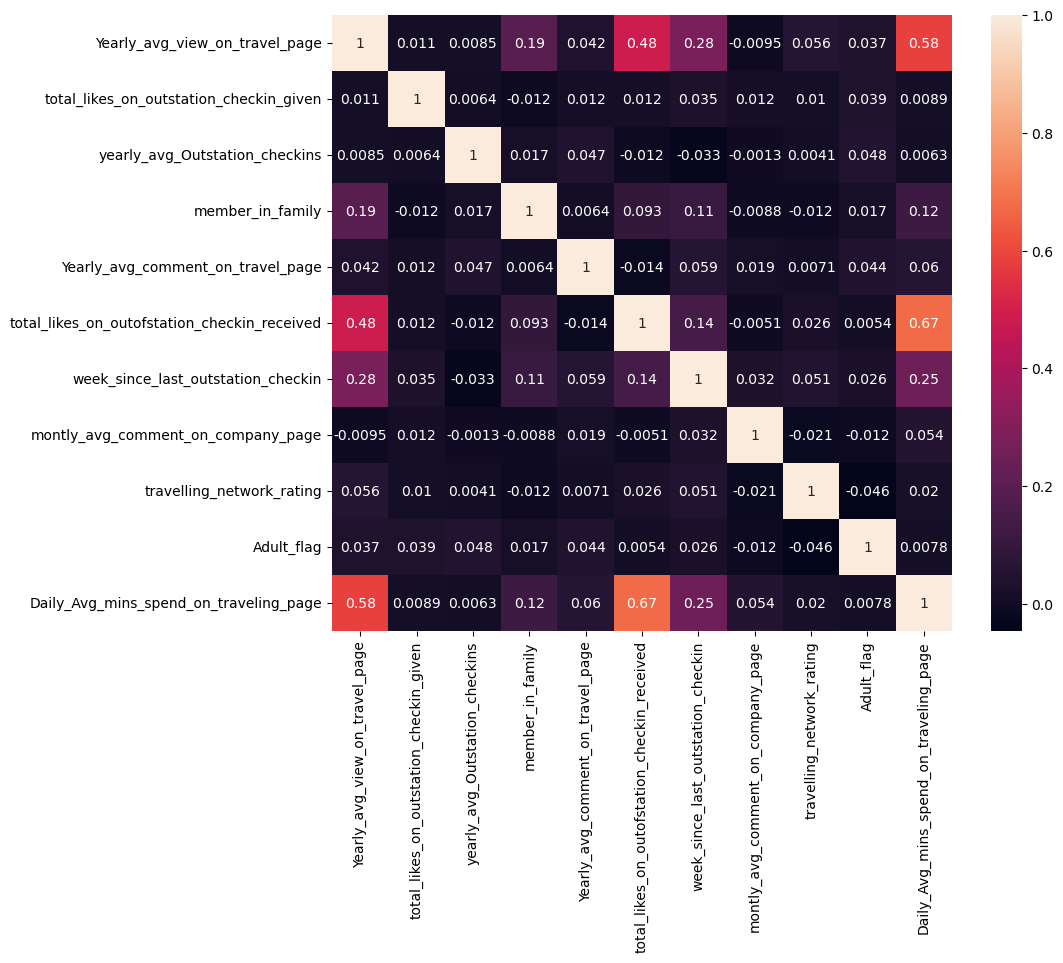

In [124]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

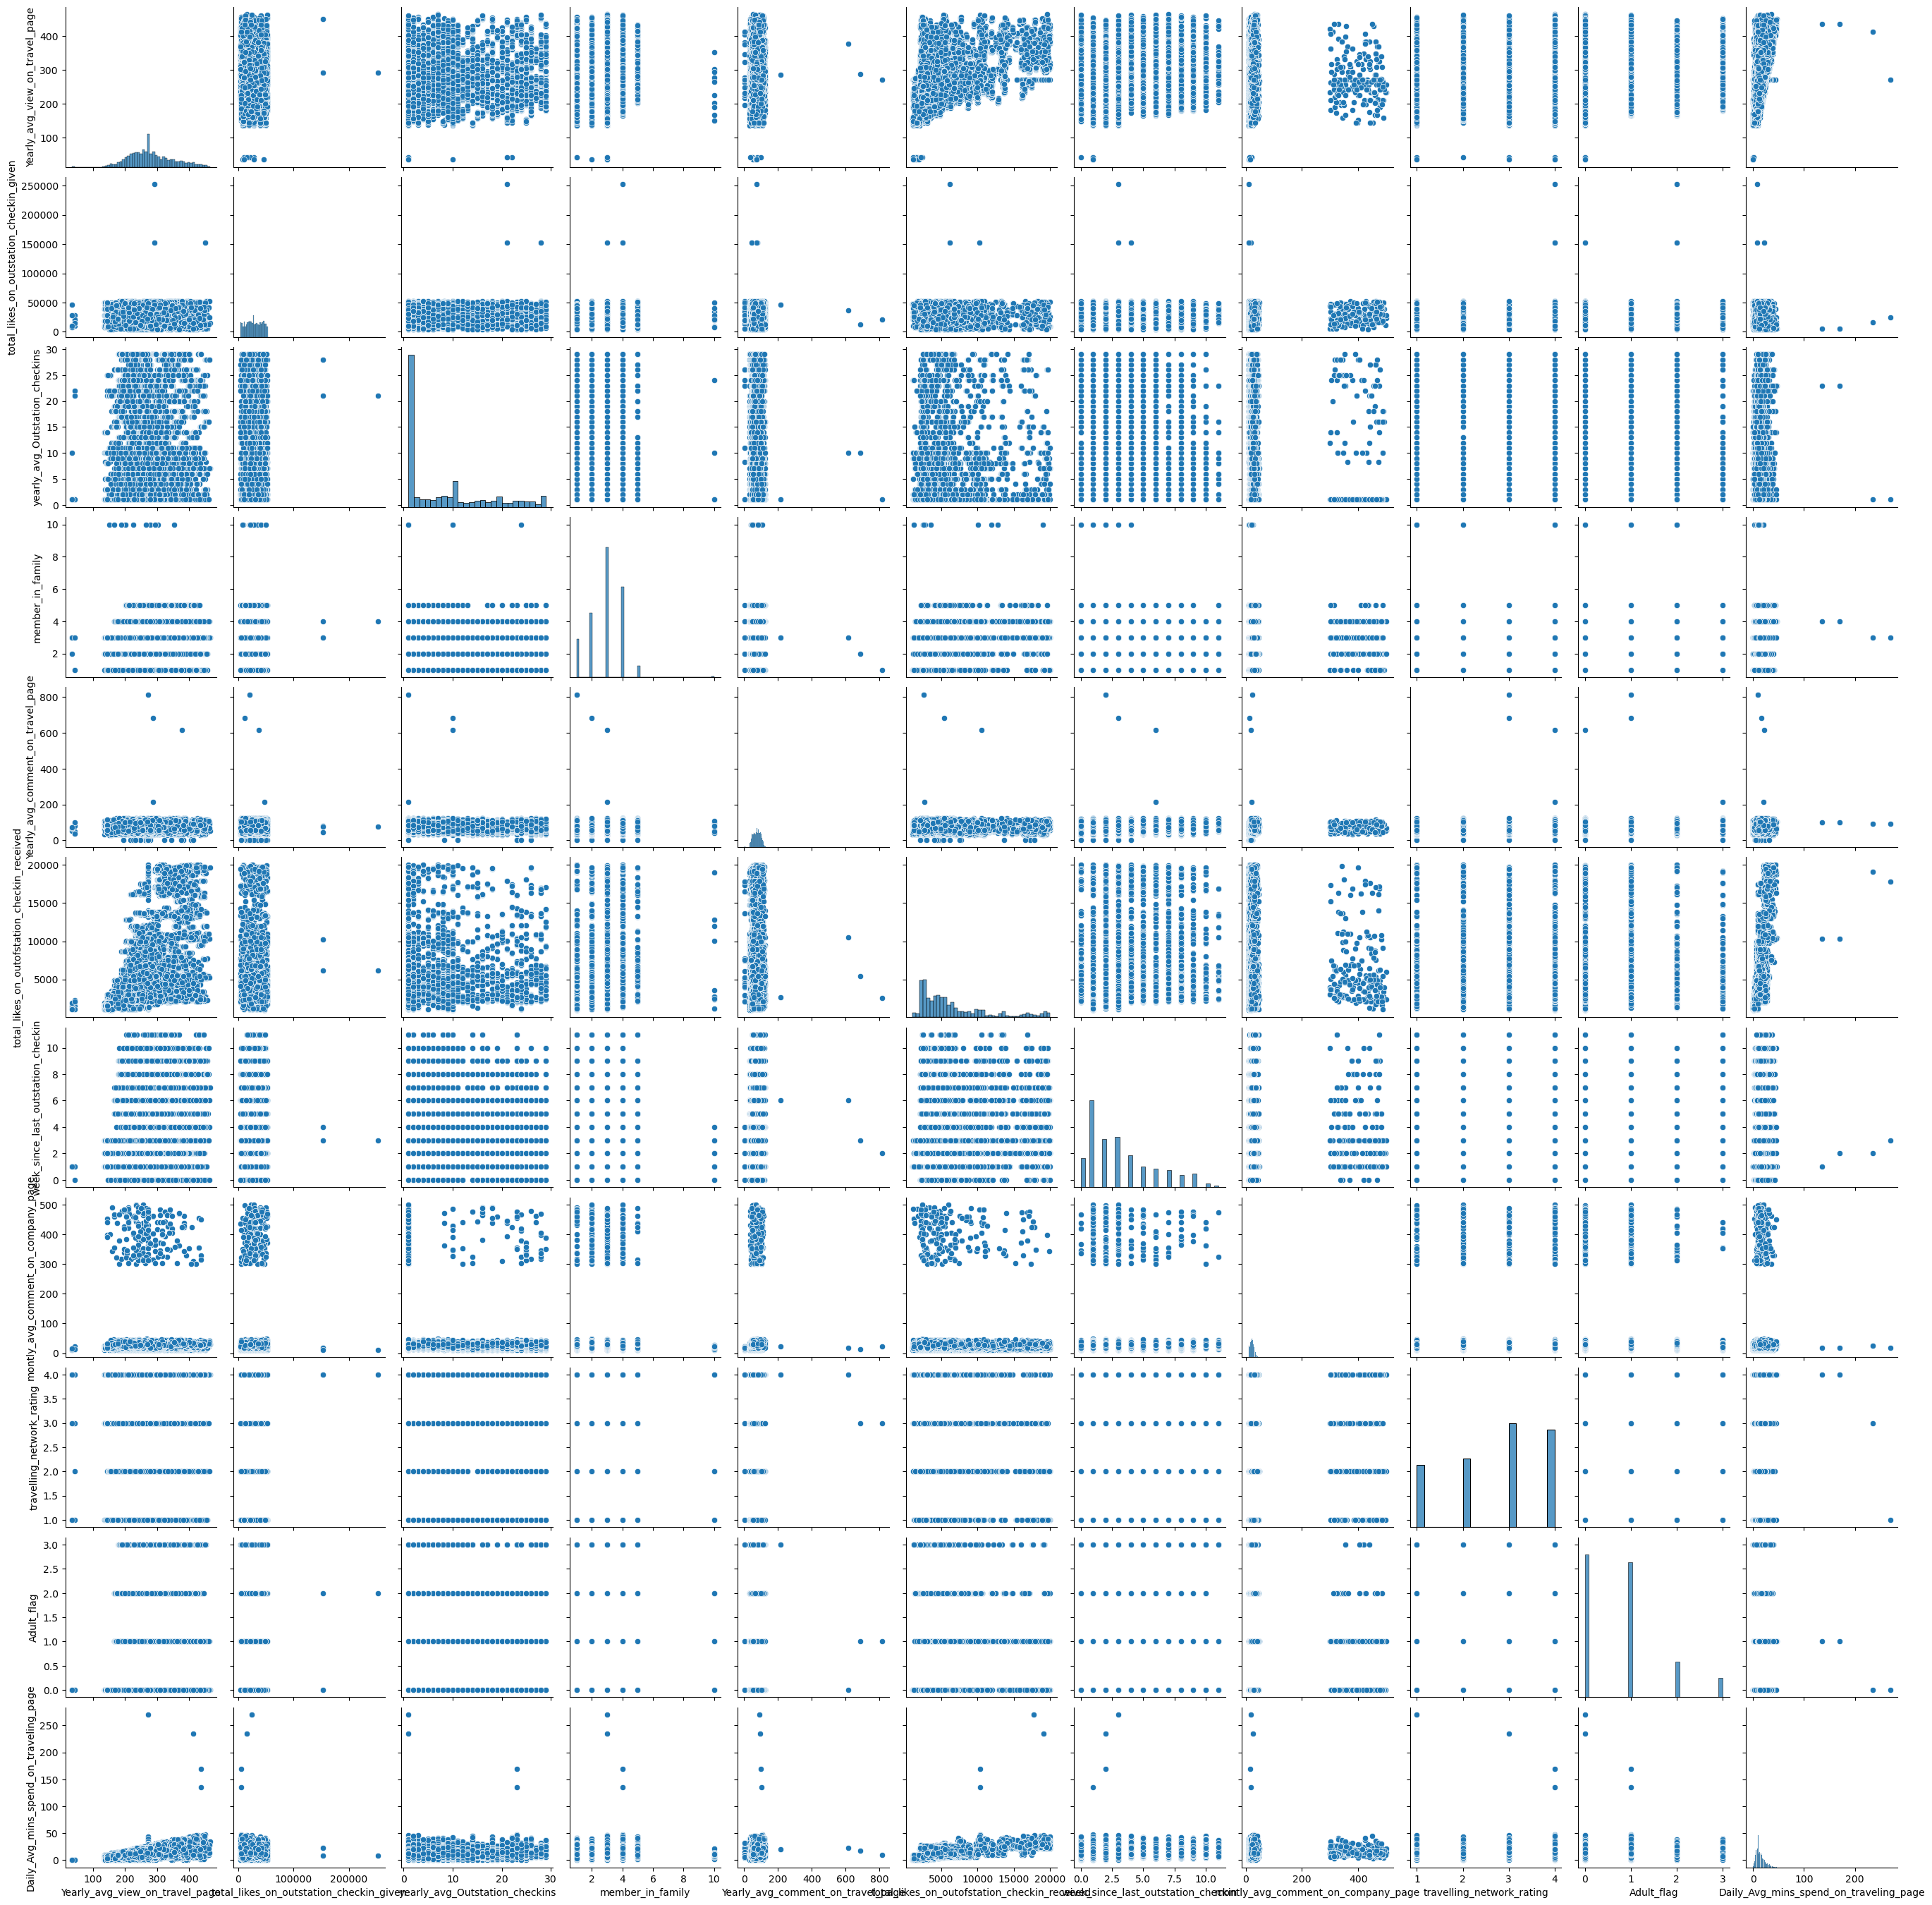

In [125]:
sns.pairplot(dataset)

In [126]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#!pip install imblearn

In [127]:
cat=[]
num=[]
for i in dataset.columns:
    if dataset[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Taken_product', 'preferred_device', 'preferred_location_type', 'following_company_page', 'working_flag']
['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'member_in_family', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page', 'travelling_network_rating', 'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page']


In [128]:
cat

['Taken_product',
 'preferred_device',
 'preferred_location_type',
 'following_company_page',
 'working_flag']

In [129]:
cat1 = ['preferred_device', 'preferred_location_type', 'following_company_page','working_flag']

In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  object 
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  float64
 5   member_in_family                              11760 non-null  float64
 6   preferred_location_type                       11760 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

# Converting Catagorical Variable to Numberical

In [131]:
#dataset['Taken_product_num']=pd.factorize(dataset.Taken_product)[0]
#dataset['preferred_device_num']=pd.factorize(dataset.preferred_device)[0]
#dataset['following_company_page_num']=pd.factorize(dataset.following_company_page)[0]
#dataset['working_flag_num']=pd.factorize(dataset.working_flag)[0]

In [132]:
#dataset.Taken_product_num.value_counts()

In [133]:
#dataset.working_flag_num.value_counts()

In [134]:
#dataset.working_flag.value_counts()

In [135]:
#dataset.Taken_product.value_counts()

In [136]:
#dataset.info()

In [137]:
dataset.preferred_device.value_counts()

Mobile    10652
Laptop     1108
Name: preferred_device, dtype: int64

In [138]:
dataset['preferred_location_type'].value_counts()

Beach              2455
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

In [139]:
#replace values for Null values
dataset['preferred_location_type'].replace('Big Cities','Other',inplace=True)
dataset['preferred_location_type'].replace('Social media','Other',inplace=True)
dataset['preferred_location_type'].replace('Trekking','Other',inplace=True)
dataset['preferred_location_type'].replace('Entertainment','Other',inplace=True)
dataset['preferred_location_type'].replace('Hill Stations','Other',inplace=True)
dataset['preferred_location_type'].replace('Tour  Travel','Other',inplace=True)
dataset['preferred_location_type'].replace('Tour and Travel','Other',inplace=True)
dataset['preferred_location_type'].replace('Game','Other',inplace=True)
dataset['preferred_location_type'].replace('OTT','Other',inplace=True)
dataset['preferred_location_type'].replace('Movie','Other',inplace=True)

#### Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to multicollinearity . This is done to ensure that we do not land in to dummy trap.

In [140]:
dataset['preferred_location_type'].value_counts()

Other              3195
Beach              2455
Financial          2409
Historical site    1856
Medical            1845
Name: preferred_location_type, dtype: int64

In [141]:
 
#dataset = pd.get_dummies(dataset, drop_first = False)

In [142]:
dataset.columns

Index(['Taken_product', 'Yearly_avg_view_on_travel_page', 'preferred_device',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [143]:
# Consider only laptop
#dataset=dataset.drop(['preferred_device_Laptop'],axis=1)

In [144]:
#dataset = pd.get_dummies(dataset, columns=["preferred_device"])

In [145]:
dataset.head()

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0           Yes                           307.0           Mobile   
1            No                           367.0           Mobile   
2           Yes                           277.0           Mobile   
3            No                           247.0           Mobile   
4            No                           202.0           Mobile   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                             1.0   
1                                   9765.0                             1.0   
2                                  48055.0                             1.0   
3                                  48720.0                             1.0   
4                                  20685.0                             1.0   

   member_in_family preferred_location_type  \
0               2.0               Financial   
1               1.0               Financial   
2               2.0                   Other   
3               4.0               Financial   
4               1.0                 Medical   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

In [146]:
dataset = pd.get_dummies(dataset, drop_first = False)

In [147]:
dataset.columns

Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin',
       'montly_avg_comment_on_company_page', 'travelling_network_rating',
       'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page',
       'Taken_product_No', 'Taken_product_Yes', 'preferred_device_Laptop',
       'preferred_device_Mobile', 'preferred_location_type_Beach',
       'preferred_location_type_Financial',
       'preferred_location_type_Historical site',
       'preferred_location_type_Medical', 'preferred_location_type_Other',
       'following_company_page_No', 'following_company_page_Yes',
       'working_flag_No', 'working_flag_Yes'],
      dtype='object')

In [148]:
X_s = StandardScaler()

In [149]:
scaled_df = X_s.fit_transform(dataset)

In [150]:
scaled_df

array([[ 0.40077353,  0.73519169, -0.83567648, ...,  1.60214824,
         0.42623002, -0.42623002],
       [ 1.30291384, -1.30057234, -0.83567648, ..., -0.62416197,
        -2.34615106,  2.34615106],
       [-0.05029662,  1.4055344 , -0.83567648, ...,  1.60214824,
         0.42623002, -0.42623002],
       ...,
       [-0.99754395, -1.60355169, -0.48861331, ...,  1.60214824,
        -2.34615106,  2.34615106],
       [ 1.52844891,  0.54302914, -0.71998876, ..., -0.62416197,
         0.42623002, -0.42623002],
       [-0.15554633, -0.43410933, -0.0258624 , ..., -0.62416197,
         0.42623002, -0.42623002]])

In [151]:
k_means = KMeans(n_clusters = 2)

In [152]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [153]:
k_means.labels_

array([1, 0, 1, ..., 0, 0, 0])

In [154]:
k_means.inertia_


255865.24368360554

In [155]:
wss =[] 

In [156]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

282240.0

In [157]:
for i in range(1,25):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [158]:
wss

[282240.0,
 255865.24368360554,
 234921.9555263867,
 215600.05231144064,
 205215.13239019478,
 199023.79644669383,
 187400.13582729784,
 176220.68413416116,
 171006.32419921074,
 161236.3287860102,
 159187.1893132338,
 153439.0287172904,
 151559.13889669778,
 148342.87977421144,
 146220.3058980492,
 144640.6356657882,
 141580.5423935087,
 139392.5768272128,
 139296.92969169683,
 137111.85429995673,
 134380.92641960067,
 133409.73079954376,
 131400.3589192095,
 130377.8884006075]

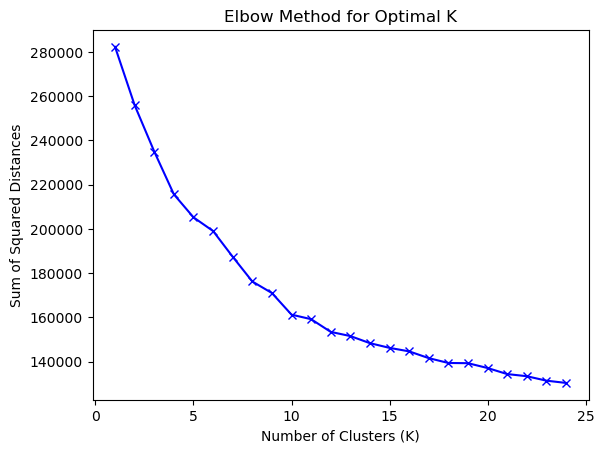

In [159]:
# Plot the elbow curve
#plt.plot(k_values, ssd, 'bx-')
plt.plot(range(1,25), wss,'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [160]:
df = pd.DataFrame(scaled_df)

In [161]:
print(df)


             0         1         2         3         4         5         6   \
0      0.400774  0.735192 -0.835676 -0.881805  0.806504 -0.114461  1.833319   
1      1.302914 -1.300572 -0.835676 -1.838891 -0.579220 -0.297827 -0.842262   
2     -0.050297  1.405534 -0.835676 -0.881805  0.722520 -0.943754  1.068868   
3     -0.501367  1.452533 -0.835676  1.032367 -0.789178 -0.769737 -0.842262   
4     -1.177972 -0.528812 -0.835676 -1.838891 -1.461045 -0.650963  2.215545   
...         ...       ...       ...       ...       ...       ...       ...   
11755 -0.020225  0.199271  1.709453 -0.881805 -0.705195 -0.831992  0.304416   
11756  0.370702 -0.470506 -0.257238 -1.838891 -0.831170  0.745642  0.304416   
11757 -0.997544 -1.603552 -0.488613  0.075281  1.184428 -0.069841 -0.077810   
11758  1.528449  0.543029 -0.719989  0.075281  0.344596 -0.231110 -0.077810   
11759 -0.155546 -0.434109 -0.025862  0.075281  1.226420 -0.438062 -0.460036   

             7         8         9   ...        14 

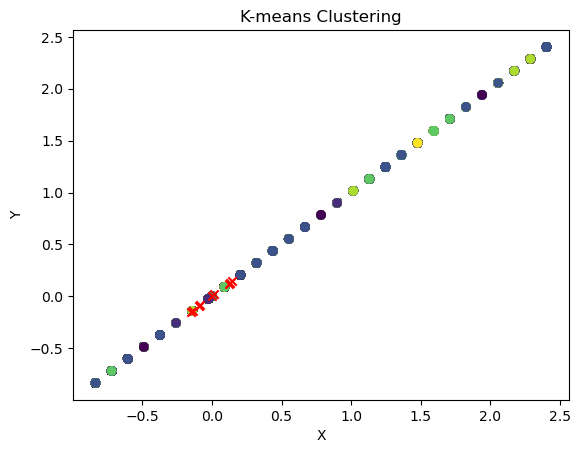

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate random data points
#np.random.seed(0)
#X = np.random.randn(100, 2)

# Perform k-means clustering


kmeans = KMeans(n_clusters=9)
kmeans.fit(scaled_df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points and cluster centroids
plt.scatter(scaled_df[:, 2], scaled_df[:, 2], c=labels)
plt.scatter(centroids[:, 2], centroids[:, 2], marker='x', color='r')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()




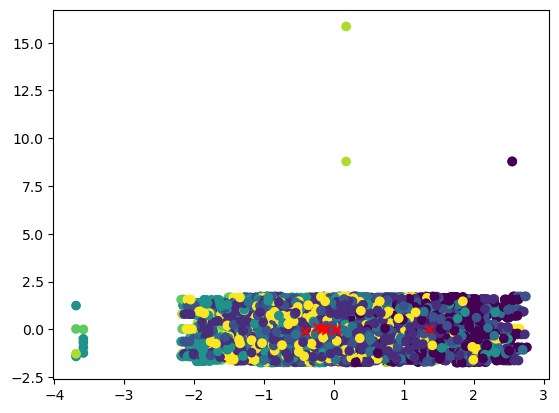

In [163]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(scaled_df)
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
plt.show()

In [164]:
k_means = KMeans(n_clusters = 9)
k_means.fit(scaled_df)
labels=k_means.labels_

In [165]:
cust_dataset=dataset

In [166]:
cust_dataset["Clus_Kmeans"]=labels
cust_dataset.head()

Yearly_avg_view_on_travel_page  total_likes_on_outstation_checkin_given  \
0                           307.0                                  38570.0   
1                           367.0                                   9765.0   
2                           277.0                                  48055.0   
3                           247.0                                  48720.0   
4                           202.0                                  20685.0   

   yearly_avg_Outstation_checkins  member_in_family  \
0                             1.0               2.0   
1                             1.0               1.0   
2                             1.0               2.0   
3                             1.0               4.0   
4                             1.0               1.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
0                                   8                                  11   
1                                   1                                  23   
2                                   6                                  15   
3                                   1                                  11   
4                                   9                                  12   

   travelling_network_rating  Adult_flag  ...  preferred_location_type_Beach  \
0                          1           0  ...                              0   
1                          4           1  ...                              0   
2                          2           0  ...                              0   
3                          3           0  ...                              0   
4                          4           1  ...                              0   

   preferred_location_type_Financial  preferred_location_type_Historical site  \
0                                  1                                        0   
1                                  1                                        0   
2                                  0                                        0   
3                                  1                                        0   
4                                  0                                        0   

   preferred_location_type_Medical  preferred_location_type_Other  \
0                                0                              0   
1                                0                              0   
2                                0                              1   
3                                0                              0   
4                                1                              0   

   following_company_page_No  following_company_page_Yes  working_flag_No  \
0                          0                           1                1   
1                          1                           0                0   
2                          0                           1                1   
3                          0                           1                1   
4                          1                           0                1   

   working_flag_Yes  Clus_Kmeans  
0                 0            5  
1                 1            1  
2                 0            5  
3                 0            6  
4                 0            4  

[5 rows x 25 columns]

In [167]:
cust_dataset.head()

Yearly_avg_view_on_travel_page  total_likes_on_outstation_checkin_given  \
0                           307.0                                  38570.0   
1                           367.0                                   9765.0   
2                           277.0                                  48055.0   
3                           247.0                                  48720.0   
4                           202.0                                  20685.0   

   yearly_avg_Outstation_checkins  member_in_family  \
0                             1.0               2.0   
1                             1.0               1.0   
2                             1.0               2.0   
3                             1.0               4.0   
4                             1.0               1.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
0                                   8                                  11   
1                                   1                                  23   
2                                   6                                  15   
3                                   1                                  11   
4                                   9                                  12   

   travelling_network_rating  Adult_flag  ...  preferred_location_type_Beach  \
0                          1           0  ...                              0   
1                          4           1  ...                              0   
2                          2           0  ...                              0   
3                          3           0  ...                              0   
4                          4           1  ...                              0   

   preferred_location_type_Financial  preferred_location_type_Historical site  \
0                                  1                                        0   
1                                  1                                        0   
2                                  0                                        0   
3                                  1                                        0   
4                                  0                                        0   

   preferred_location_type_Medical  preferred_location_type_Other  \
0                                0                              0   
1                                0                              0   
2                                0                              1   
3                                0                              0   
4                                1                              0   

   following_company_page_No  following_company_page_Yes  working_flag_No  \
0                          0                           1                1   
1                          1                           0                0   
2                          0                           1                1   
3                          0                           1                1   
4                          1                           0                1   

   working_flag_Yes  Clus_Kmeans  
0                 0            5  
1                 1            1  
2                 0            5  
3                 0            6  
4                 0            4  

[5 rows x 25 columns]

In [168]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [169]:
silhouette_score(scaled_df,labels)

0.11623161097772156

In [170]:
sil_width=silhouette_samples(scaled_df,labels)

In [171]:
cust_dataset["sil_width"]=sil_width
cust_dataset.head()

Yearly_avg_view_on_travel_page  total_likes_on_outstation_checkin_given  \
0                           307.0                                  38570.0   
1                           367.0                                   9765.0   
2                           277.0                                  48055.0   
3                           247.0                                  48720.0   
4                           202.0                                  20685.0   

   yearly_avg_Outstation_checkins  member_in_family  \
0                             1.0               2.0   
1                             1.0               1.0   
2                             1.0               2.0   
3                             1.0               4.0   
4                             1.0               1.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
0                                   8                                  11   
1                                   1                                  23   
2                                   6                                  15   
3                                   1                                  11   
4                                   9                                  12   

   travelling_network_rating  Adult_flag  ...  \
0                          1           0  ...   
1                          4           1  ...   
2                          2           0  ...   
3                          3           0  ...   
4                          4           1  ...   

   preferred_location_type_Financial  preferred_location_type_Historical site  \
0                                  1                                        0   
1                                  1                                        0   
2                                  0                                        0   
3                                  1                                        0   
4                                  0                                        0   

   preferred_location_type_Medical  preferred_location_type_Other  \
0                                0                              0   
1                                0                              0   
2                                0                              1   
3                                0                              0   
4                                1                              0   

   following_company_page_No  following_company_page_Yes  working_flag_No  \
0                          0                           1                1   
1                          1                           0                0   
2                          0                           1                1   
3                          0                           1                1   
4                          1                           0                1   

   working_flag_Yes  Clus_Kmeans  sil_width  
0                 0            5   0.123107  
1                 1            1   0.029931  
2                 0            5   0.157774  
3                 0            6  -0.000500  
4                 0            4   0.060134  

[5 rows x 26 columns]

In [172]:
silhouette_samples(scaled_df,labels).min()

-0.16844653405214569

In [173]:
cust_dataset.to_csv('km_dum.csv')

In [174]:
dataset.columns

Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin',
       'montly_avg_comment_on_company_page', 'travelling_network_rating',
       'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page',
       'Taken_product_No', 'Taken_product_Yes', 'preferred_device_Laptop',
       'preferred_device_Mobile', 'preferred_location_type_Beach',
       'preferred_location_type_Financial',
       'preferred_location_type_Historical site',
       'preferred_location_type_Medical', 'preferred_location_type_Other',
       'following_company_page_No', 'following_company_page_Yes',
       'working_flag_No', 'working_flag_Yes', 'Clus_Kmeans', 'sil_width'],
      dtype='object')

In [175]:
dataset.preferred_device_Mobile.value_counts()

1    10652
0     1108
Name: preferred_device_Mobile, dtype: int64

In [176]:
dataset.columns

Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin',
       'montly_avg_comment_on_company_page', 'travelling_network_rating',
       'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page',
       'Taken_product_No', 'Taken_product_Yes', 'preferred_device_Laptop',
       'preferred_device_Mobile', 'preferred_location_type_Beach',
       'preferred_location_type_Financial',
       'preferred_location_type_Historical site',
       'preferred_location_type_Medical', 'preferred_location_type_Other',
       'following_company_page_No', 'following_company_page_Yes',
       'working_flag_No', 'working_flag_Yes', 'Clus_Kmeans', 'sil_width'],
      dtype='object')

In [177]:
dataset.head()

Yearly_avg_view_on_travel_page  total_likes_on_outstation_checkin_given  \
0                           307.0                                  38570.0   
1                           367.0                                   9765.0   
2                           277.0                                  48055.0   
3                           247.0                                  48720.0   
4                           202.0                                  20685.0   

   yearly_avg_Outstation_checkins  member_in_family  \
0                             1.0               2.0   
1                             1.0               1.0   
2                             1.0               2.0   
3                             1.0               4.0   
4                             1.0               1.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
0                                   8                                  11   
1                                   1                                  23   
2                                   6                                  15   
3                                   1                                  11   
4                                   9                                  12   

   travelling_network_rating  Adult_flag  ...  \
0                          1           0  ...   
1                          4           1  ...   
2                          2           0  ...   
3                          3           0  ...   
4                          4           1  ...   

   preferred_location_type_Financial  preferred_location_type_Historical site  \
0                                  1                                        0   
1                                  1                                        0   
2                                  0                                        0   
3                                  1                                        0   
4                                  0                                        0   

   preferred_location_type_Medical  preferred_location_type_Other  \
0                                0                              0   
1                                0                              0   
2                                0                              1   
3                                0                              0   
4                                1                              0   

   following_company_page_No  following_company_page_Yes  working_flag_No  \
0                          0                           1                1   
1                          1                           0                0   
2                          0                           1                1   
3                          0                           1                1   
4                          1                           0                1   

   working_flag_Yes  Clus_Kmeans  sil_width  
0                 0            5   0.123107  
1                 1            1   0.029931  
2                 0            5   0.157774  
3                 0            6  -0.000500  
4                 0            4   0.060134  

[5 rows x 26 columns]

In [260]:
X=dataset[['Daily_Avg_mins_spend_on_traveling_page','Yearly_avg_view_on_travel_page',
        'total_likes_on_outstation_checkin_given',
        'yearly_avg_Outstation_checkins', 
        'member_in_family',
        'Yearly_avg_comment_on_travel_page',
        'total_likes_on_outofstation_checkin_received',
        'week_since_last_outstation_checkin',
        'montly_avg_comment_on_company_page', 'travelling_network_rating',
        'Adult_flag',
        'preferred_location_type_Financial',
        'preferred_location_type_Historical site',
        'preferred_location_type_Medical', 'preferred_location_type_Other',
        'following_company_page_Yes',
         'working_flag_Yes','preferred_device_Laptop']]
    
    
   

In [261]:
y=dataset[['Taken_product_Yes']]

#### Partitioning the data into train and test

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
#X = dataset.drop('Taken_product_Yes', axis = 1)
#y = dataset['Taken_product_Yes']

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

In [265]:
print(X_train.shape)
print(X_test.shape)

(8232, 18)
(3528, 18)


##### Why stratify = y?
Please note, because this data is highly imbalanced and could possibly result into different proportions in the y variable between train and test set.

In [266]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

Taken_product_Yes
0                    0.84
1                    0.16
dtype: float64
 
Taken_product_Yes
0                    0.84
1                    0.16
dtype: float64


In [267]:
#dataset['preferred_device'].value_counts()

print(y_train.value_counts())
print(' ')
print(y_test.value_counts())


Taken_product_Yes
0                    6905
1                    1327
dtype: int64
 
Taken_product_Yes
0                    2959
1                     569
dtype: int64


#### Treating target imbalance using SMOTE

In [268]:
!pip install imblearn

In [269]:
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [270]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_res)))

The number of classes before fit Counter({'Taken_product_Yes': 1})
The number of classes after fit Counter({'Taken_product_Yes': 1})


In [271]:
dataset_smote = pd.concat([X_res, y_res], axis = 1)

In [272]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#classifier=RandomForestClassifier()
#classifier=LogisticRegression()
#classifier=LinearDiscriminantAnalysis()
#classifier.fit(X_res,y_res)

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score

In [274]:
models={
"LinearDiscriminantAnalysis":LinearDiscriminantAnalysis(),
#"Logistic Regression":LogisticRegression(),
#"Decision Tree":DecisionTreeClassifier(),
#"Random Forest":RandomForestClassifier()
#"Random Forest":RandomForestClassifier(n_estimators= 500, min_samples_split= 2, max_features= 8, max_depth= 15)    
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    #model.fit(X_res,y_res) #Train Model
    model.fit(X_train,y_train) #Train Model
 
 #Make Predictions
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)


#Training set performance

model_train_accuracy=accuracy_score(y_train,y_train_pred)
model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
model_train_precision=precision_score(y_train,y_train_pred)
model_train_recall=recall_score(y_train,y_train_pred)
model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)


#testing set performance
model_test_accuracy=accuracy_score(y_test,y_test_pred)
model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
model_test_precision=precision_score(y_test,y_test_pred)
model_test_recall=recall_score(y_test,y_test_pred)
model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)


print(f"----------------------Train Model Before SMOTE-------------------------")
print(list(models.keys())[i])
print('Model performance for Training set')
print(" - Accuracy: {:.4f}".format(model_train_accuracy))
print(" - F1 score: {:.4f}".format(model_train_f1))
print(' -Precision: {:.4f}'.format(model_train_precision))
print(' -Recall: {:.4f}'.format(model_train_recall))
print(' -Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

print(f"----------------------Test Model Before SMOTE-------------------------")
print('Model performance for testing set')
print(" - Accuracy: {:.4f}".format(model_test_accuracy))
print(" - F1 score: {:.4f}".format(model_test_f1))
print(' -Precision: {:.4f}'.format(model_test_precision))
print(' -Recall: {:.4f}'.format(model_test_recall))
print(' -Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
#print('='*35)
#print('\n')

----------------------Train Model Before SMOTE-------------------------
LinearDiscriminantAnalysis
Model performance for Training set
 - Accuracy: 0.8547
 - F1 score: 0.8220
 -Precision: 0.6527
 -Recall: 0.2110
 -Roc Auc Score: 0.5947
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6905
           1       0.65      0.21      0.32      1327

    accuracy                           0.85      8232
   macro avg       0.76      0.59      0.62      8232
weighted avg       0.83      0.85      0.82      8232

[[6756  149]
 [1047  280]]
----------------------Test Model Before SMOTE-------------------------
Model performance for testing set
 - Accuracy: 0.8552
 - F1 score: 0.8249
 -Precision: 0.6436
 -Recall: 0.2285
 -Roc Auc Score: 0.6021
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2959
           1       0.64      0.23      0.34       569

    accuracy                           0.

In [275]:
clf.coef_

NameError: name 'clf' is not defined

# Hyper Parameter Tuning

In [320]:
rf_params = {
    'max_depth': [5, 8,15,None ,10],
    'max_features': [5, 7, "auto", 8],
    'min_samples_split': [2, 8, 15,20]}
    #'n_estimators': [100, 200,500,1000] For RF

In [321]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20]}

In [322]:
# Models list for Hyper Parameter tuning
randomcv_models= [
                  #("LinearDiscriminantAnalysis",LinearDiscriminantAnalysis(),rf_params)
                  #("RF",RandomForestClassifier(),rf_params)
                  ("DT",DecisionTreeClassifier(),rf_params)
                ]

In [323]:
randomcv_models

[('DT',
  DecisionTreeClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20]})]

In [324]:
****************stop**********************************

SyntaxError: invalid syntax (106741346.py, line 1)

In [325]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random= RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)
                              

   
    

    random.fit(X_res,y_res)
    model_param[name]=random.best_params_
    
    for model_name in model_param:
        print(f"----------------------Best Params for {model_name}-------------------------")
        print(model_param[model_name])
        

Fitting 3 folds for each of 80 candidates, totalling 240 fits
----------------------Best Params for DT-------------------------
{'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [327]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#model=DecisionTreeClassifier(criterion='gini',random_state=1, splitter='best')  # Strategy to choose the split at each node ('best' or 'random'), For DT)
#model=RandomForestClassifier(criterion='gini',random_state=1)

In [328]:
models={
#"LinearDiscriminantAnalysis":LinearDiscriminantAnalysis()
#"Logistic Regression":LogisticRegression(),
"Decision Tree":DecisionTreeClassifier(criterion ='gini', max_features= 7, max_depth= 15, random_state=1),
#"Random Forest":RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 7,max_depth= 15,criterion='gini',random_state=1)
#"Random Forest":RandomForestClassifier()
#"Decision Tree":DecisionTreeClassifier()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_res,y_res) #Train Model SMOTE
    #model.fit(X_train,y_train) #Train Model

#Make Predictions
y_train_pred=model.predict(X_res)
y_test_pred=model.predict(X_test)


#Training set performance
model_train_accuracy=accuracy_score(y_res,y_train_pred)
model_train_f1=f1_score(y_res,y_train_pred,average='weighted')
model_train_precision=precision_score(y_res,y_train_pred)
model_train_recall=recall_score(y_res,y_train_pred)
model_train_rocauc_score=roc_auc_score(y_res,y_train_pred)

#testing set performance
model_test_accuracy=accuracy_score(y_test,y_test_pred)
model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
model_test_precision=precision_score(y_test,y_test_pred)
model_test_recall=recall_score(y_test,y_test_pred)
model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)


print(f"----------------------Train Model After SMOTE-----------------")
print(list(models.keys())[i])
print('Model performance for Training set')
print(" - Accuracy: {:.4f}".format(model_train_accuracy))
print(" - F1 score: {:.4f}".format(model_train_f1))
print(' -Precision: {:.4f}'.format(model_train_precision))
print(' -Recall: {:.4f}'.format(model_train_recall))
print(' -Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
print(classification_report(y_res,y_train_pred))
print(f"----------------------Confusion Matrix Train Model After SMOTE----------------")
print(confusion_matrix(y_res,y_train_pred))

print(f"----------------------Test Model After SMOTE--------------------")
print('Model performance for testing set')
print(" - Accuracy: {:.4f}".format(model_test_accuracy))
print(" - F1 score: {:.4f}".format(model_test_f1))
print(' -Precision: {:.4f}'.format(model_test_precision))
print(' -Recall: {:.4f}'.format(model_test_recall))
print(' -Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
print(classification_report(y_test,y_test_pred))
print(f"----------------------Confusion Matrix Test Model After SMOTE---------------")
print(confusion_matrix(y_test,y_test_pred))

#print('='*35)
#print('\n')

----------------------Train Model After SMOTE-----------------
Decision Tree
Model performance for Training set
 - Accuracy: 0.9815
 - F1 score: 0.9814
 -Precision: 0.9878
 -Recall: 0.9687
 -Roc Auc Score: 0.9799
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6905
           1       0.99      0.97      0.98      5178

    accuracy                           0.98     12083
   macro avg       0.98      0.98      0.98     12083
weighted avg       0.98      0.98      0.98     12083

----------------------Confusion Matrix Train Model After SMOTE----------------
[[6843   62]
 [ 162 5016]]
----------------------Test Model After SMOTE--------------------
Model performance for testing set
 - Accuracy: 0.9226
 - F1 score: 0.9248
 -Precision: 0.7249
 -Recall: 0.8383
 -Roc Auc Score: 0.8886
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2959
           1       0.72      0.84      0.78  

In [329]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_res)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [330]:
print(model)

DecisionTreeClassifier(max_depth=15, max_features=7, random_state=1)


AUC for the Training Data: 0.999
AUC for the Test Data: 0.905


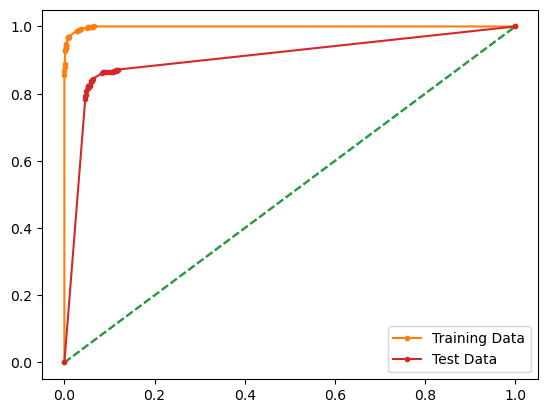

In [331]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_res,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_res,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [296]:
#Finding Feature importance

from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_res), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


AttributeError: 'LogisticRegression' object has no attribute 'tree_'

The above code will save a .dot file in your working directory.  
WebGraphviz is Graphviz in the Browser.   
Copy paste the contents of the file into the link below to get the visualization     
http://webgraphviz.com/

In [ ]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_res.columns).sort_values('Imp',ascending=False))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some sample data
X = np.random.rand(100, 2)

# Define a range of K values to evaluate
k_values = range(1, 10)

# Initialize an empty list to store the sum of squared distances
ssd = []

# Iterate over each value of K
for k in k_values:
    # Fit K-means clustering on the data
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    # Append the sum of squared distances to the list
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, ssd, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate random data points
np.random.seed(0)
X = np.random.randn(100, 2)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points and cluster centroids
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()